In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import pycountry
import geopandas as gpd
import matplotlib.patches as mpatches
from matplotlib.patches import Patch
import altair as alt




In [143]:
custom_palette = ['#002a80', '#2c4fab', '#5974d6', '#889eec', '#bac9fe', 
                  '#ffe7c0', '#ffcf9f', '#ffb67e', '#ff9b5c', '#ff7d36']
custom_style = {
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.spines.left': False,  # Remove left if you want minimal style
    'axes.spines.bottom': False,
    'axes.grid': True,
    'grid.color': '#e1e1e1',  # Light grey grid
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'legend.frameon': False  # No border around legends
}

# Apply custom style and palette
sns.set_palette(custom_palette)
sns.set_theme(style="whitegrid", rc=custom_style) 



#### WHO downloaded data

In [144]:
budget = pd.read_csv('WHO data/WHO_TB_budget_2024-11-18.csv')
laboratories = pd.read_csv('WHO data/WHO_TB_laboratories_2024-11-18.csv')
expenditure = pd.read_csv('WHO data/WHO_TB_expenditure_utilisation_2024-11-18.csv')
notification_who = pd.read_csv('WHO data/WHO_TB_notifications_2024-11-19.csv')

#### Outputs generated from WHO TB Github repo

General

In [145]:
who_region_shortnames = pd.read_excel('githuboutputs/who_region_shortnames.xlsx')
est_country = pd.read_excel('githuboutputs/est_country.xlsx')
est_regional = pd.read_excel('githuboutputs/est_regional.xlsx')
est_global = pd.read_excel('githuboutputs/est_global.xlsx')

In [146]:
report_year = 2024

2.1. Case notifications

In [147]:
#notification
notification = pd.read_excel('githuboutputs/notification.xlsx')
#Case notifications of people diagnosed with TB, MDR/RR-TB and XDR-TB, globally and for WHO regions, 2023
t2_1_1 = pd.read_excel('githuboutputs/t2.1.1_data.xlsx')
# Global trend in case notifications of people newly diagnosed with TB, 2010–2023
f2_1_1 = pd.read_excel('githuboutputs/f2.1.1_data.xlsx')
#Regional trends in case notifications of people newly diagnosed with TB, 2010–2023
f2_1_2 = pd.read_excel('githuboutputs/f2.1.2_data.xlsx')
#Case notifications of people newly diagnosed with TB in the 30 high TB burden and three global TB watchlist countries, 2010–2023
f2_1_3 = pd.read_excel('githuboutputs/f2.1.3_data.xlsx')
# Percentage of people notified as a new or relapse case of TB who were diagnosed with extrapulmonary TB, by country, 2023
f2_1_6 = pd.read_excel('githuboutputs/f2.1.6_data.xlsx')


2.2. Diagnostic testing

In [148]:
#Percentage of people newly diagnosed with pulmonary TB who were bacteriologically confirmed, globally and for WHO regions,a 2010–2023
f2_2_1 = pd.read_excel('githuboutputs/f2.2.1_data.xlsx')
#Percentage of people newly diagnosed with pulmonary TB who were bacteriologically confirmed, by country, 2023
bacconf_data = pd.read_excel('githuboutputs/bacconf_data.xlsx')

# 5 - 7 are the same, just different levels/regions
#Percentage of people newly diagnosed with TB who were initially tested with a WHO-recommended rapid diagnostic test (WRD), globally and for WHO regions, 2015–2023a
f2_2_5 = pd.read_excel('githuboutputs/f2.2.5_data.xlsx')

#Percentage of people newly diagnosed with TB who were initially tested with a WHO-recommended rapid diagnostic test (WRD), by country,a 2023
f2_2_6 = pd.read_excel('githuboutputs/f2.2.6_data.xlsx')

#Percentage of people newly diagnosed with TB who were initially tested with a WHO-recommended rapid diagnostic test (WRD), 30 high TB burden countries, 2015–2023
f2_2_7 = pd.read_excel('githuboutputs/f2.2.7_data.xlsx')

#Proportion of diagnostic sites for TB with access to WHO-recommended rapid diagnostic tests (WRDs), by country, 2023
f2_2_8 = pd.read_excel('githuboutputs/f2.2.8_data.xlsx')

# Percentage of people initially tested for TB with a WHO-recommended rapid diagnostic test (WRD) who had a positive test result, 30 high TB burden countries, WHO regions and globally, 2021–2023a
f2_2_9 = pd.read_excel('githuboutputs/f2.2.9_data.xlsx')

2.3 TB treatment: coverage and outcomes

In [149]:
#Number of people newly diagnosed with TB and officially notified as a TB case (new and relapse cases, all forms) (black)
# compared with the estimated number of people who developed TB (incident cases) (green), 2010–2023, globally and for WHO regions
f2_3_1 = pd.read_excel('githuboutputs/f2.3.1_data.xlsx')

# Estimated TB treatment coverage, globally and WHO regions, 2010–2023
f2_3_2a = pd.read_excel('githuboutputs/f2.3.2a_data.xlsx') #globally
f2_3_2b = pd.read_excel('githuboutputs/f2.3.2b_data.xlsx') #WHO regions

#Estimated TB treatment coverage,a 2010–2023, 30 high TB burden countries
f2_3_3 = pd.read_excel('githuboutputs/f2.3.3_data.xlsx')

#Estimated TB treatment coveragea among people aged 0–14 years and people aged ≥15 years in 2023, 30 high TB burden countries, WHO regions and globally
f2_3_4a = pd.read_excel('githuboutputs/f2.3.4a_data.xlsx')
f2_3_4b = pd.read_excel('githuboutputs/f2.3.4b_data.xlsx')

#The ten countries with the largest gaps between notifications of people with a new or relapse episode of TB and the best estimates of TB incidence, 2023a
f2_3_5 = pd.read_excel('githuboutputs/f2.3.5_data.xlsx')


### TB diagnosis

#### Case notifications

In [150]:
#Tuberculosis (TB) case notifications refer to people diagnosed with TB disease and officially reported as a case to national authorities. 
# Case notifications of people diagnosed with TB, MDR/RR-TB and XDR-TB, globally and for WHO regions, 2023
t2_1_1.rename(columns={
    'entity': 'WHO region',
    'c_notified': 'Total notified',
    'c_newinc': 'New and relapse',
    'newrel_pulm': 'Pulmonary new and relapse number',
    'newrel_pulm_conf_pct': 'Pulmonary new and relapse bacteriologically confirmed (%)',
    'newrel_ep_pct': 'Extrapulmonary new and relapse (%)',
    'newrel_hivpos': 'People living with HIV, new and relapse',
    'conf_rr_nfqr': 'MDR/RR-TB only',
    'conf_rr_fqr': 'pre-XDR-TB or XDR-TB'
}, inplace=True)

t2_1_1

,WHO region,Total notified,New and relapse,Pulmonary new and relapse number,Pulmonary new and relapse bacteriologically confirmed (%),Extrapulmonary new and relapse (%),"People living with HIV, new and relapse",MDR/RR-TB only,pre-XDR-TB or XDR-TB
0,African Region,1917797,1882966,1654538,69.189526,12.131286,314460,21482,1040
1,Region of the Americas,285597,264077,228948,81.413247,13.302559,23601,5819,309
2,South-East Asia Region,3992545,3831189,3056843,60.075836,20.211637,64245,70531,13767
3,European Region,171355,148633,125905,69.681903,15.291355,19184,29459,10599
4,Eastern Mediterranean Region,645236,638521,494080,55.310274,22.621182,2087,5150,1085
5,Western Pacific Region,1418659,1394737,1293773,58.038620,7.238927,13228,27243,2182
6,Global,8431189,8160123,6854087,62.436952,16.005102,436805,159684,28982


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: Futur

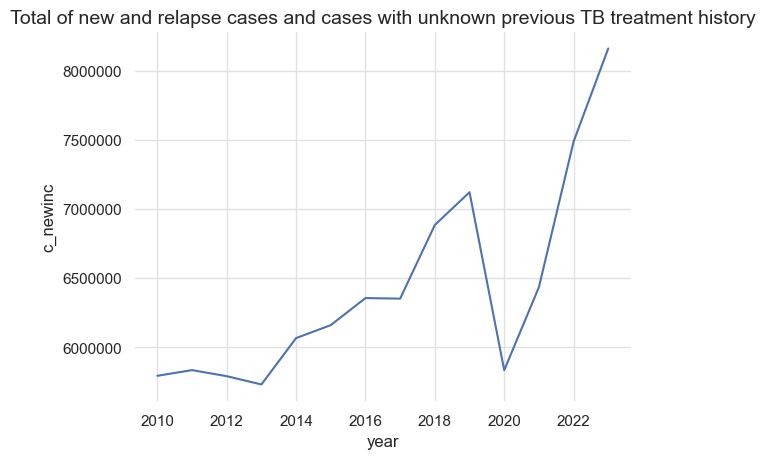

In [151]:
# Global trend in case notifications of people newly diagnosed with TB, 2010–2023
sns.lineplot(x='year', y='c_newinc', data=f2_1_1)
plt.title('Total of new and relapse cases and cases with unknown previous TB treatment history')
plt.ticklabel_format(style='plain', axis='y')


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: Futur

Text(0.5, 1.0, 'Case notifications of people newly diagnosed with TB, Pakistan, 2010–2023')

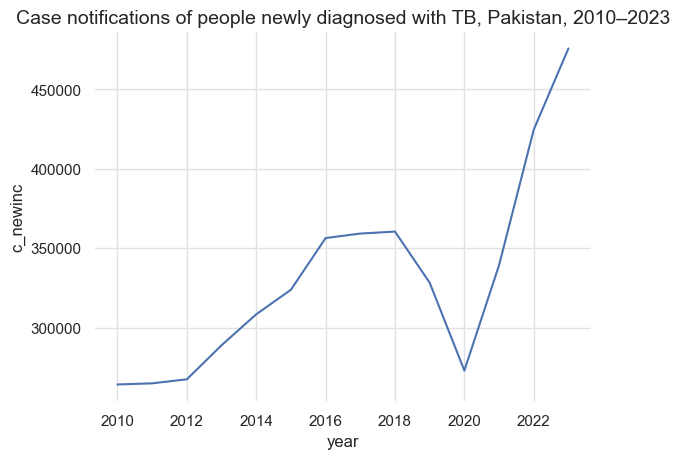

In [152]:
f2_1_3_pak = f2_1_3[f2_1_3['country'] == 'Pakistan']
sns.lineplot(x='year', y='c_newinc', data=f2_1_3_pak)
plt.title('Case notifications of people newly diagnosed with TB, Pakistan, 2010–2023')

Fig 2.1.6 shows % of people notified as a new or relapse case of TB who were diagnosed with extrapulmonary TB 


Below is the code they use to calculate it

ep_data <- notification %>%
  filter(year  >= report_year - 2) %>%
  select(iso3,
         country,
         year,
         new_labconf, new_clindx, new_ep,
         ret_rel_labconf, ret_rel_clindx, ret_rel_ep) %>%

  # calculate % of extrapulmonary cases
  rowwise() %>%
  mutate(newrel_tot = sum(c_across(new_labconf:ret_rel_ep), na.rm = TRUE)) %>%
  mutate(ep_tot = sum(c_across(contains("_ep")), na.rm = TRUE)) %>%
  ungroup() %>%
  mutate(ep_pct = ifelse(newrel_tot > 0,
                         ep_tot * 100 / newrel_tot,
                         NA)) %>%

  # Assign the categories for the map
  mutate(var = cut(ep_pct,
                   c(0, 10, 20, 30, Inf),
                   c('0\u20139.9', '10\u201319', '20\u201329', '\u226530'),
                   right=FALSE))

# Find the countries with empty data for latest year and see if there are data for the previous year
ep_prev_year_data <- ep_data %>%
  filter(year == report_year - 1 & is.na(ep_pct)) %>%
  select(iso3) %>%
  inner_join(filter(ep_data, year == report_year - 2), by = "iso3") %>%
  filter(!is.na(ep_pct))

# Now combine into one dataframe, with previous data used if latest year's data are not available
f2.1.6_data <- ep_data %>%
  filter(year == report_year - 1) %>%
  anti_join(ep_prev_year_data, by= "iso3") %>%
  rbind(ep_prev_year_data)


We don't care about Extrapulmonary vs. Pulmonary, we care about Pulmonary Bacteriologically Confirmed vs. Clinically Diagnosed

#### Diagnostic testing

We already have the data for % bacteriologically confirmed (bacconf_data) and below is the code for clinically diagnosed (it is just the reverse, pretty much useless i was just testing sth)

In [153]:
# Filter and select relevant columns
clindx_data = notification[notification['year'] >= 2010][[
    'iso3',
    'country',
    'year',
    'g_whoregion',
    'new_sp',
    'new_sn',
    'new_su',
    'new_labconf', 'new_clindx',
    'ret_rel_labconf', 'ret_rel_clindx'
]]

# Calculate % of pulmonary cases clinically diagnosed
def calculate_clindx(row):
    if row['year'] < 2013 and row['g_whoregion'] != 'EUR':
        numerator = row[['new_sn', 'new_su']].sum(min_count=1)
        denominator = row[['new_sp', 'new_sn', 'new_su']].sum(min_count=1)
    else:
        numerator = row[['new_clindx', 'ret_rel_clindx']].sum(min_count=1)
        denominator = row[['new_labconf', 'new_clindx', 'ret_rel_labconf', 'ret_rel_clindx']].sum(min_count=1)

    # Adjust calculation for EUR pre-2013 (applies to years 2010 - 2012)
    if 2010 <= row['year'] <= 2012 and row['g_whoregion'] == 'EUR':
        numerator = row['new_clindx']
        denominator = row[['new_sp', 'new_sn', 'new_su']].sum(min_count=1)

    return pd.Series({'clindx_pct_numerator': numerator, 'clindx_pct_denominator': denominator})

# Apply row-wise calculations
clindx_data[['clindx_pct_numerator', 'clindx_pct_denominator']] = clindx_data.apply(calculate_clindx, axis=1)

# Select and reduce to needed variables
clindx_data = clindx_data[[
    'country',
    'iso3',
    'year',
    'g_whoregion',
    'clindx_pct_numerator',
    'clindx_pct_denominator'
]]


# Calculate regional aggregates
clindx_data_regional = clindx_data.groupby(['year', 'g_whoregion'])[['clindx_pct_numerator', 'clindx_pct_denominator']].sum().reset_index()

# Merge with regional names if available
clindx_data_regional = clindx_data_regional.merge(who_region_shortnames, on='g_whoregion', how='inner').drop(columns=['g_whoregion'])

# Calculate global aggregates
clindx_data_global = clindx_data.groupby('year')[['clindx_pct_numerator', 'clindx_pct_denominator']].sum().reset_index()
clindx_data_global['entity'] = 'Global'


1.  Percentage of new and relapse cases that were bacteriological confirmed

In [154]:
f2_2_1_global = f2_2_1[f2_2_1['entity'] == 'Global']
fig1 = f2_1_1.merge(f2_2_1_global, on='year', how='inner')

In [155]:
fig1['bacconf_pct'] = fig1['bacconf_pct'] /100
fig1['bact_conf_abs'] = fig1['c_newinc'] * fig1['bacconf_pct'] 
fig1['not_bact_conf_abs'] =  fig1['c_newinc'] * (1- fig1['bacconf_pct'] )
fig1.head()

,year,c_newinc,y_min,y_max,entity_x,bacconf_pct_numerator,bacconf_pct_denominator,entity_y,bacconf_pct,bact_conf_abs,not_bact_conf_abs
0,2010,5794510,5480000,7540000,Global,2701837,4659396,Global,0.579869,3.360054e+06,2.434456e+06
1,2011,5835643,5480000,7540000,Global,2671796,4672227,Global,0.571846,3.337091e+06,2.498552e+06
2,2012,5791712,5480000,7540000,Global,2607174,4657377,Global,0.559794,3.242168e+06,2.549544e+06
3,2013,5732020,5480000,7540000,Global,2837142,4893173,Global,0.579816,3.323519e+06,2.408501e+06
4,2014,6067033,5480000,7540000,Global,2989073,5174405,Global,0.577665,3.504713e+06,2.562320e+06


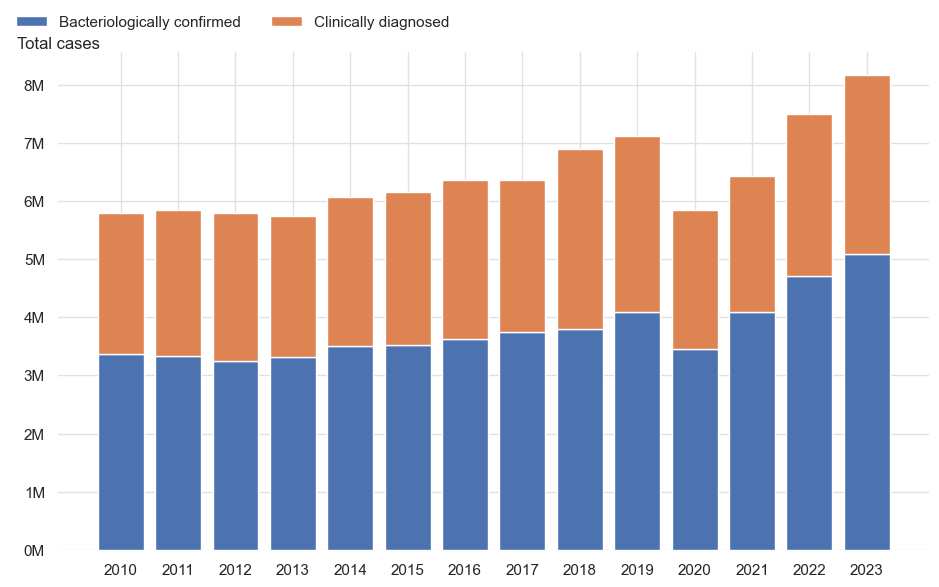

In [156]:
# Create the figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Stacked bar chart for bacteriologically confirmed and not bacteriologically confirmed cases
ax1.bar(fig1['year'], fig1['bact_conf_abs'] / 1_000_000, 
        label='Bacteriologically confirmed', zorder=1)
ax1.bar(fig1['year'], fig1['not_bact_conf_abs'] / 1_000_000, 
        bottom=fig1['bact_conf_abs'] / 1_000_000, 
        label='Clinically diagnosed', zorder=1)

# Set y-axis labels and formatting
ax1.set_ylabel('Total cases', rotation=0, labelpad=20)  # Rotate horizontally
ax1.yaxis.set_label_coords(0, 1)  # Adjust position (x, y coordinates above the axis)

# Custom y-axis formatter to append "M" for millions
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.0f}M'))

# Remove vertical gridlines for clarity
# ax1.grid(axis='x', linestyle='--')

years = fig1['year'].unique()
filtered_years = [year for year in years if year != 2024]  # Exclude 2024
ax1.set_xticks(filtered_years)

# Add a legend above the plot
ax1.legend(loc='upper right', bbox_to_anchor=(0.465, 1.1), ncol=2, frameon=False)

# Show the plot
plt.tight_layout()
plt.show()


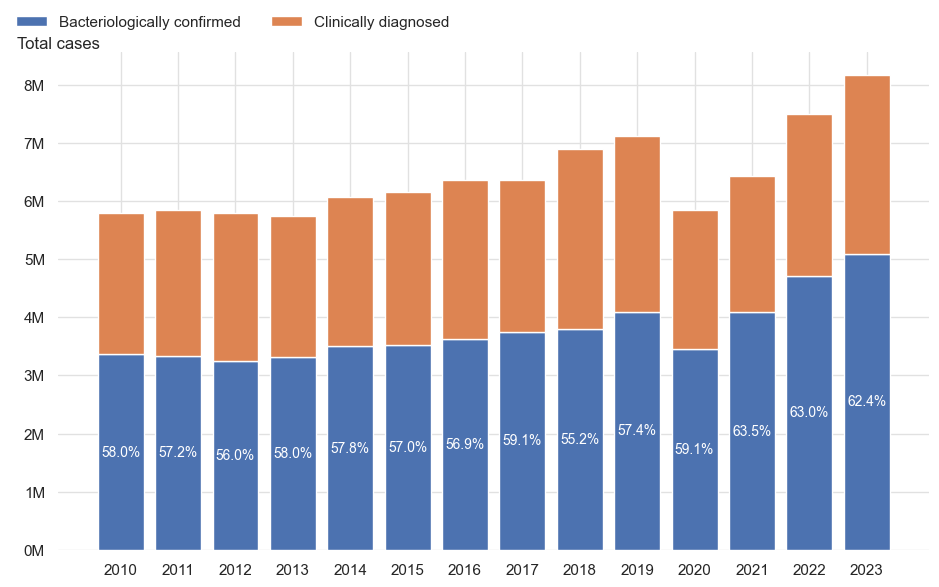

In [157]:
# Create the figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Stacked bar chart for bacteriologically confirmed and clinically diagnosed cases
bar1 = ax1.bar(fig1['year'], fig1['bact_conf_abs'] / 1_000_000, 
               label='Bacteriologically confirmed', zorder=1)
bar2 = ax1.bar(fig1['year'], fig1['not_bact_conf_abs'] / 1_000_000, 
               bottom=fig1['bact_conf_abs'] / 1_000_000, 
               label='Clinically diagnosed', zorder=1)

# Add percentage text labels to the blue bars
for bar, pct in zip(bar1, fig1['bacconf_pct']):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height / 2,  
             f'{pct * 100:.1f}%', ha='center', va='center', color='white', fontsize=10)

# Set y-axis labels and formatting
ax1.set_ylabel('Total cases', rotation=0, labelpad=20)  # Rotate horizontally
ax1.yaxis.set_label_coords(0, 1)  # Adjust position (x, y coordinates above the axis)

# Custom y-axis formatter to append "M" for millions
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.0f}M'))

# Remove vertical gridlines for clarity
# ax1.grid(axis='x', linestyle='--')

years = fig1['year'].unique()
filtered_years = [year for year in years if year != 2024]  # Exclude 2024
ax1.set_xticks(filtered_years)

# Add a legend above the plot
ax1.legend(loc='upper right', bbox_to_anchor=(0.465, 1.1), ncol=2, frameon=False)

# Show the plot
plt.tight_layout()
plt.show()


2. Percentage of people newly diagnosed with TB who were initially tested with WRD

To understand how wrd_pcnt (Percentage of people newly diagnosed with TB who were initially tested with a WHO-recommended rapid diagnostic test (WRD)) is calculated, see code below:

rdx_data_available: 

0=No; 

60= Yes available from the routine surveillance system; 

61=Yes estimated from a review of a random sample of medical records; 

62= Yes available from the routine surveillance system disaggregated by case type

- rdxsurvey_newin: (if rdx_data_available=61) Number of new and relapse cases whose medical records or treatment cards were included in the survey
- rdxsurvey_newinc_rdx: Among the cases reported in rdxsurvey_newinc the number tested using a WHO-recommended rapid diagnostic (such as Xpert MTB/RIF) at the time of TB diagnosis (regardless of test result)


(regardless of test result)
-  **newinc_ep_rdx**: Number of new and relapse extrapulmonary cases notified and tested using a WHO-recommended rapid diagnostic (for example Xpert MTB/RIF) at the time of TB diagnosis *extrapulmonary*
-  **newinc_pulm_clindx_rd**: Number of new and relapse pulmonary clinically diagnosed cases notified and tested using a WHO-recommended rapid diagnostic (for example Xpert MTB/RIF) at the time of TB diagnosis  *pulmonary clinically diagnosed*
- **newinc_pulm_labconf_rdx**: Number of new and relapse pulmonary bacteriologically confirmed cases notified and tested using a WHO-recommended rapid diagnostic (for example Xpert MTB/RIF) at the time of TB diagnosis (regardless of test result) *pulmonary bacteriologically confirmed* 
-  **newinc_rdx**: Number of new and relapse cases notified and tested using a WHO-recommended rapid diagnostic (for example Xpert MTB/RIF) at the time of TB diagnosis  *ALL*

In [158]:
f2_2_5_data = notification[notification['year'] >= 2015][[
    'year', 'g_whoregion', 'c_newinc', 'rdx_data_available', 'newinc_rdx', 
    'newinc_pulm_labconf_rdx', 'newinc_pulm_clindx_rdx', 'newinc_ep_rdx', 
    'rdxsurvey_newinc', 'rdxsurvey_newinc_rdx'
]]

# Row-wise calculations for 'newinc_rdx' based on conditions
def calculate_newinc_rdx(row):
    if row['rdx_data_available'] == 61:
        return row[['rdxsurvey_newinc', 'rdxsurvey_newinc_rdx']].sum(skipna=True)
    elif row['rdx_data_available'] == 62:
        return row[['newinc_pulm_labconf_rdx', 'newinc_pulm_clindx_rdx', 'newinc_ep_rdx']].sum(skipna=True)
    else:
        return row['newinc_rdx']

f2_2_5_data['newinc_rdx'] = f2_2_5_data.apply(calculate_newinc_rdx, axis=1)

# Group by year and region and aggregate the sums
f2_2_5_data = f2_2_5_data.groupby(['year', 'g_whoregion'], as_index=False).sum(numeric_only=True)

# Calculate 'wrd_pcnt' as the percentage
f2_2_5_data['wrd_pcnt'] = f2_2_5_data['newinc_rdx'] * 100 / f2_2_5_data['c_newinc']

# Merge with regional names
f2_2_5_data = pd.merge(f2_2_5_data, who_region_shortnames, on='g_whoregion', how='inner')

# Drop 'c_newinc' and 'g_whoregion' columns
f2_2_5_data = f2_2_5_data.drop(columns=['c_newinc', 'g_whoregion'])

# Global trend
f2_2_5_data_global = notification[notification['year'] >= 2015][[
    'year', 'g_whoregion', 'c_newinc', 'rdx_data_available', 'newinc_rdx', 
    'newinc_pulm_labconf_rdx', 'newinc_pulm_clindx_rdx', 'newinc_ep_rdx', 
    'rdxsurvey_newinc', 'rdxsurvey_newinc_rdx'
]]

f2_2_5_data_global['newinc_rdx'] = f2_2_5_data_global.apply(calculate_newinc_rdx, axis=1)

# Group by year and aggregate the sums
f2_2_5_data_global = f2_2_5_data_global.groupby(['year'], as_index=False).sum(numeric_only=True)

# Calculate 'wrd_pcnt' as the percentage
f2_2_5_data_global['wrd_pcnt'] = f2_2_5_data_global['newinc_rdx'] * 100 / f2_2_5_data_global['c_newinc']

# Drop 'c_newinc' and add 'Global' as entity
f2_2_5_data_global = f2_2_5_data_global.drop(columns=['c_newinc'])
f2_2_5_data_global['entity'] = 'Global'

# Combine global and regional data
f2_2_5_data_combined = pd.concat([f2_2_5_data, f2_2_5_data_global], axis=0)

# Sort by 'entity' and 'year'
f2_2_5_data_combined = f2_2_5_data_combined.sort_values(by=['entity', 'year'])

# Change the order of the entities
f2_2_5_data_combined['entity'] = pd.Categorical(f2_2_5_data_combined['entity'], 
    categories=["Global", "African Region", "Region of the Americas", "South-East Asia Region", 
                "European Region", "Eastern Mediterranean Region", "Western Pacific Region"], 
    ordered=True)

# Final result
f2_2_5_data_combined = f2_2_5_data_combined.reset_index(drop=True)

In [159]:
f2_2_5_country= notification[notification['year'] >= 2015][['country', 'iso3',
    'year', 'g_whoregion', 'c_newinc', 'rdx_data_available', 'newinc_rdx', 
    'newinc_pulm_labconf_rdx', 'newinc_pulm_clindx_rdx', 'newinc_ep_rdx', 
    'rdxsurvey_newinc', 'rdxsurvey_newinc_rdx'
]]

f2_2_5_data['newinc_rdx'] = f2_2_5_data.apply(calculate_newinc_rdx, axis=1)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: Futur

(0.0, 100.0)

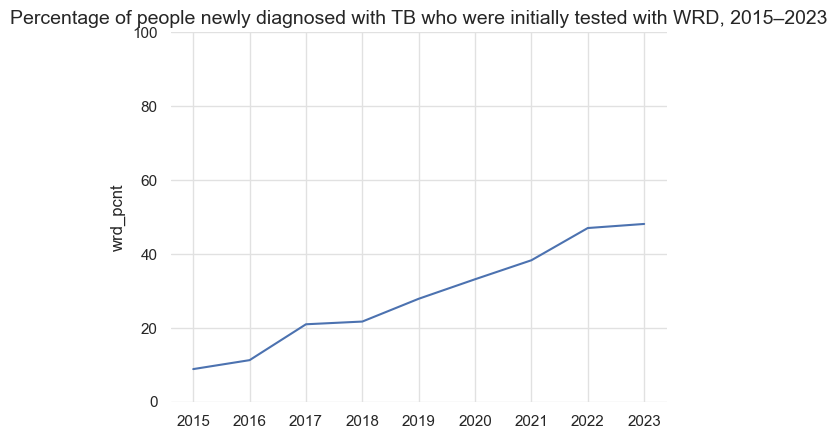

In [160]:
f2_2_5_global = f2_2_5[f2_2_5['entity'] == 'Global']

wrd_global = sns.lineplot(x='year', y='wrd_pcnt', data=f2_2_5_global)
wrd_global.set_title('Percentage of people newly diagnosed with TB who were initially tested with WRD, 2015–2023')
wrd_global.ticklabel_format(style='plain', axis='y')
wrd_global.set_xlabel('')
wrd_global.set_ylim(0, 100)



In [161]:
f2_2_5.head()

,year,rdx_data_available,newinc_rdx,wrd_pcnt,entity
0,2015,1560,313375,24.166557,African Region
1,2016,1200,212699,16.698567,African Region
2,2017,1921,292833,22.229012,African Region
3,2018,2160,436393,31.761765,African Region
4,2019,2102,474761,33.900700,African Region


In [162]:
f2_2_7.head()

,entity,iso3,year,rdx_data_available,wrd_pcnt_nu,wrd_pcnt_de,wrd_pcnt
0,Angola,AGO,2015,0,NaN,NaN,NaN
1,Angola,AGO,2016,60,452.0,59513.0,0.759498
2,Angola,AGO,2017,0,NaN,NaN,NaN
3,Angola,AGO,2018,60,NaN,66189.0,NaN
4,Angola,AGO,2019,0,NaN,NaN,NaN


In [163]:
f2_2_7_2023 = f2_2_7[f2_2_7['year'] == 2023]
f2_2_7_2023['wrd_pcnt'].describe()

count    29.000000
mean     56.739485
std      24.353542
min       1.783954
25%      36.952213
50%      60.628252
75%      72.685909
max      98.901925
Name: wrd_pcnt, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: Futur

(0.0, 100.0)

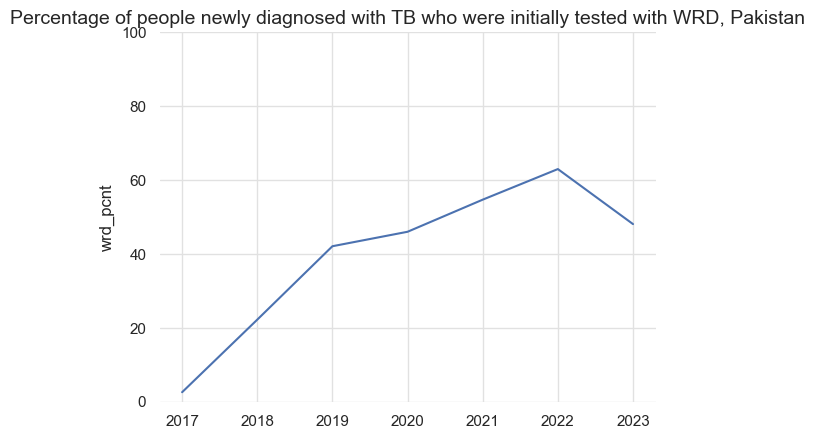

In [164]:
f2_2_7_pak = f2_2_7[f2_2_7['entity'] == 'Pakistan']

wrd_pak = sns.lineplot(x='year', y='wrd_pcnt', data=f2_2_7_pak)
wrd_pak.set_title('Percentage of people newly diagnosed with TB who were initially tested with WRD, Pakistan')
wrd_pak.ticklabel_format(style='plain', axis='y')
wrd_pak.set_xlabel('')
wrd_pak.set_ylim(0, 100)


3. Proportion of diagnostic sites for TB with access to WHO-recommended rapid diagnostic tests (WRDs) (Fig 2.2.8) + 30 high TB burden countries

In [165]:
#sort by wrd_pct ascending
f2_2_8 =f2_2_8.sort_values(by='wrd_pct', ascending=False)
f2_2_8.head(50)

#show hbc30 = g_hb_tb
f2_2_8_hbc30 = f2_2_8[f2_2_8['hbc30'] == 'g_hb_tb']
f2_2_8_hbc30

,country,iso3,year,m_wrd,dx_test_sites,wrd_pct,var,hbc30,hbtbhiv30,hbmdr30
128,Mongolia,MNG,2023,42.0,42.0,100.000000,≥90,g_hb_tb,NaN,g_hb_mdr
111,Lesotho,LSO,2023,29.0,29.0,100.000000,≥90,g_hb_tb,g_hb_tbhiv,NaN
136,Namibia,NAM,2023,41.0,41.0,100.000000,≥90,g_hb_tb,g_hb_tbhiv,NaN
212,South Africa,ZAF,2023,173.0,180.0,96.111111,≥90,g_hb_tb,g_hb_tbhiv,g_hb_mdr
36,China,CHN,2023,2612.0,2879.0,90.725947,≥90,g_hb_tb,g_hb_tbhiv,g_hb_mdr
213,Zambia,ZMB,2023,332.0,492.0,67.479675,50–75,g_hb_tb,g_hb_tbhiv,g_hb_mdr
153,Papua New Guinea,PNG,2023,70.0,123.0,56.910569,50–75,g_hb_tb,NaN,g_hb_mdr
32,Central African Republic,CAF,2023,43.0,87.0,49.425287,25–49,g_hb_tb,g_hb_tbhiv,NaN
130,Mozambique,MOZ,2023,233.0,488.0,47.745902,25–49,g_hb_tb,g_hb_tbhiv,g_hb_mdr
67,Gabon,GAB,2023,12.0,27.0,44.444444,25–49,g_hb_tb,g_hb_tbhiv,NaN


/var/folders/w9/4s00gf1j7sl8k190_53qgb7c0000gn/T/ipykernel_85728/1621284497.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/var/folders/w9/4s00gf1j7sl8k190_53qgb7c0000gn/T/ipykernel_85728/1621284497.py:51: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  color_patches = [mpatches.Patch(color=palette_map[i],
/var/folders/w9/4s00gf1j7sl8k190_53qgb7c0000gn/T/ipykernel_85728/1621284497.py:58: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  no_data_patch = mpatches.Patch(color='#d8d8d8',


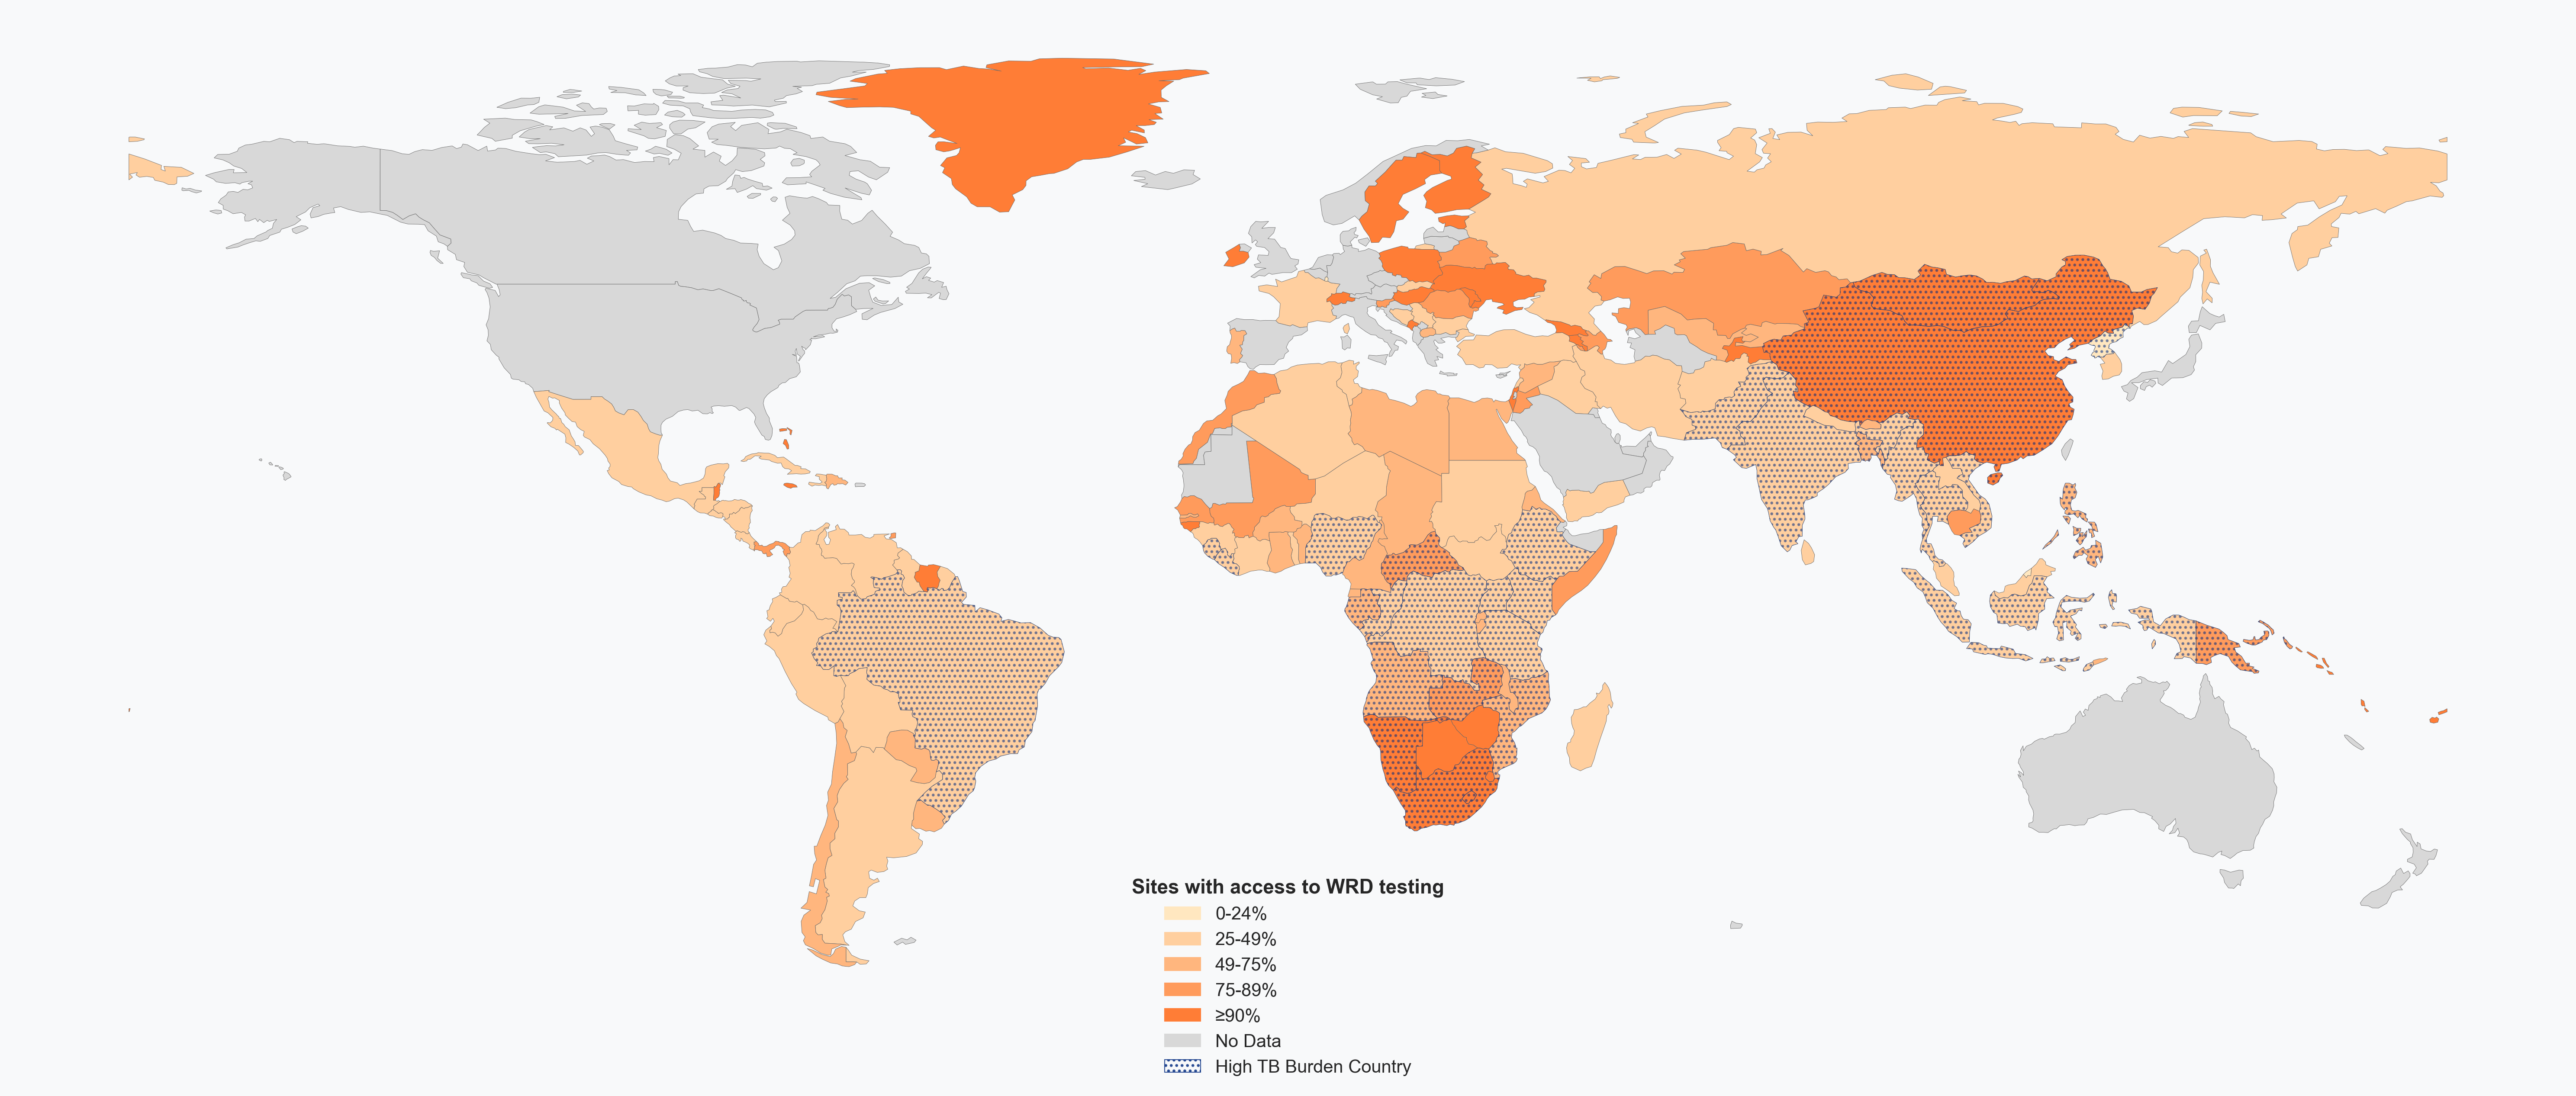

In [166]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
f2_2_8_map = world.merge(f2_2_8, how="left", left_on="iso_a3", right_on="iso3")
f2_2_8_map = f2_2_8_map[f2_2_8_map['continent'] != 'Antarctica']


# Define color palette and scale
palette_map = [  '#ffe7c0',  '#ffcf9f','#ffb67e',  '#ff9b5c','#ff7d36']
color_scale = [0, 25, 49, 75, 89]


# Function to get the color based on 'wrd_pct'
def get_color(wrd_pct):
    if pd.isna(wrd_pct):
        return '#d8d8d8'  # Grey for No Data
    wrd_pct = min(max(wrd_pct, 0), 100)
    for i, val in enumerate(color_scale):
        if wrd_pct <= val:
            return palette_map[i]
    return palette_map[-1]

# Apply the colors to the 'color' column
f2_2_8_map['color'] = f2_2_8_map['wrd_pct'].apply(get_color)

# Create figure with specific dimensions and DPI
fig, ax = plt.subplots(1, 1, figsize=(20, 12), dpi=300)

# Add background color
ax.set_facecolor('#F8F9FA')
fig.patch.set_facecolor('#F8F9FA')

# Plot the base map with custom colors
f2_2_8_map.plot(ax=ax, 
           color=f2_2_8_map['color'], 
           legend=False, 
           missing_kwds={'color': '#d8d8d8'},
           linewidth=0.2,  # Thinner borders
           edgecolor='#666666')  # Softer border color

# Add hatching for high burden countries with more subtle pattern
f2_2_8_map[f2_2_8_map['hbc30'] == 'g_hb_tb'].plot(
    ax=ax,
    color='None',
    hatch='....', 
    edgecolor='#002a80',
    linewidth=0.2,
    alpha=0.5
)

# Create custom legend with refined styling
legend_labels = ['0-24%', '25-49%', '49-75%', '75-89%', '≥90%']
color_patches = [mpatches.Patch(color=palette_map[i], 
                                label=legend_labels[i],
                                edgecolor='#666666',
                                linewidth=0.5) 
                for i in range(len(palette_map))]

# Add "No Data" label (for #d8d8d8)
no_data_patch = mpatches.Patch(color='#d8d8d8', 
                               label='No Data',
                               edgecolor='#666666',
                               linewidth=0.5)

# Add refined hatch pattern to legend
hatch_patch = mpatches.Patch(facecolor='None', 
                             hatch='....',
                             label='High TB Burden Country', 
                             edgecolor='#002a80',##
                             linewidth=0.5,
                             alpha=0.8)

# Combine all legend elements
all_patches = color_patches + [no_data_patch, hatch_patch]

# Add legend with refined styling
legend = ax.legend(handles=all_patches, 
                  title="Sites with access to WRD testing", 
                  loc='lower center',
                  bbox_to_anchor=(0.5, -0.08), 
                  fontsize=10)

# Style the legend title
legend.get_title().set_fontsize('11')
legend.get_title().set_fontweight('bold')

# Add title with better styling
#plt.title('Global Access to WRDs in TB diagnosis sites, 2023', 
        #  pad=20,
         # fontsize=16,
         # fontweight='bold')

# Add subtle caption
#plt.figtext(0.99, 0.01, 'Data source: WHO Global TB Database', 
 #           ha='right', 
  #          va='bottom', 
   #         fontsize=8, 
    #        style='italic',
     #       color='#666666')

# Remove axes
ax.set_axis_off()

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

In [167]:
#calculate number of g_hb_tb countries that have over 90% access to WRD
g_hb_tb = f2_2_8_map[f2_2_8_map['hbc30'] == 'g_hb_tb']
g_hb_tb_90 = g_hb_tb[g_hb_tb['wrd_pct'] >= 90]
g_hb_tb_90['country'].count()

5

#### 2.3 TB treatment coverage 

 TB treatment coverage in the European Region in 2023 is underestimated, because at the time the data snapshot for this webpage was taken (29 July 2024), 15 countries had not yet reported notification data for 2023 to WHO. Once data from these countries have been reported, it is anticipated that treatment coverage in 2023 will be similar to the level of 2022.

1. Number of people newly diagnosed with TB and officially notified as a TB case (new and relapse cases, all forms)  compared with the estimated number of people who developed TB (incident cases) (green)

2. Treatment Coverage:  Notifications of people with a new or relapse episode of TB as a percentage of estimated incident TB cases, in the same year.

TB treatment coverage can be approximated as the number of people newly diagnosed with TB and officially reported as a TB case in a given year (i.e. the black lines in Fig. 2.3.1), divided by the estimated number of people who developed TB in the same year (i.e. the green curves in Fig. 2.3.1), expressed as a percentage.

In [168]:
# f2_3_2a Global
# f2_3_2b regional 
# f2_3_3 30 high TB burden countries

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

Text(2010, 91, 'WHO Target')

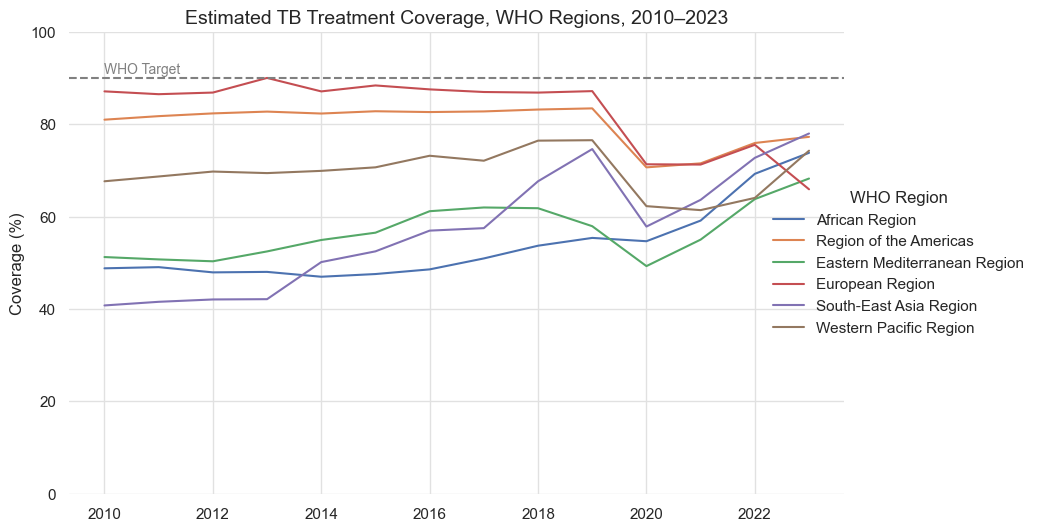

In [169]:
f2_3_2b

#line plot c_cdr, with different colors for each region using custom palette, legend on the right
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='c_cdr', hue='entity', data=f2_3_2b)
plt.title('Estimated TB Treatment Coverage, WHO Regions, 2010–2023')
plt.ylabel('Coverage (%)')
plt.xlabel('')
plt.legend(title='WHO Region', loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.ylim(0, 100)

#add horizontal line at 90% for reference
plt.axhline(y=90, color='grey', linestyle='--')
plt.text(2010, 91, 'WHO Target', color='grey', fontsize=10)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: Futur

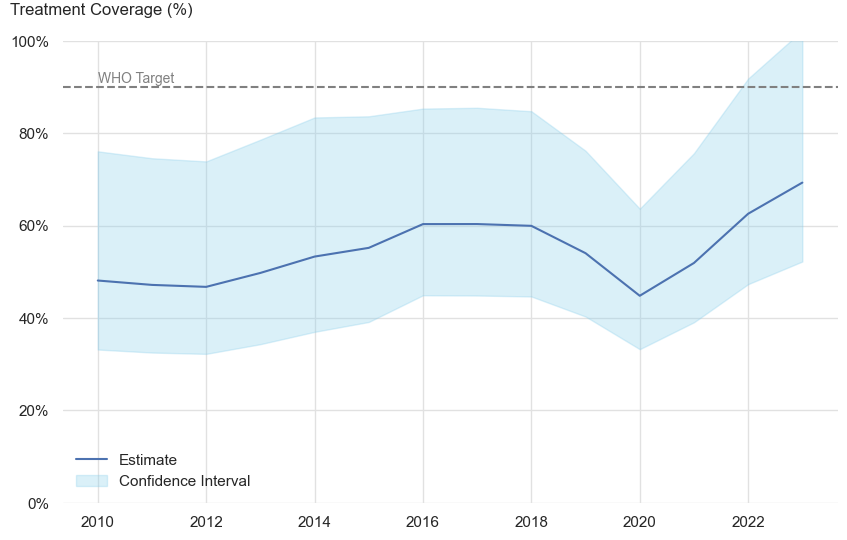

In [170]:
f2_3_3_pak = f2_3_3[f2_3_3['entity'] == 'Pakistan']

# Plot the main line
plt.figure(figsize=(10, 6))
wrd_pak = sns.lineplot(x='year', y='c_cdr', data=f2_3_3_pak, label='Estimate')

#adding Confidence intervals
plt.fill_between(f2_3_3_pak['year'], 
                 f2_3_3_pak['c_cdr_lo'], 
                 f2_3_3_pak['c_cdr_hi'], 
                 color='skyblue', 
                 alpha=0.3, 
                 label='Confidence Interval')


#wrd_pak.set_title('Estimated TB treatment coverage, Pakistan')
wrd_pak.ticklabel_format(style='plain', axis='y')
wrd_pak.set_ylim(0, 100)
wrd_pak.set_xlabel('')
wrd_pak.set_ylabel('Treatment Coverage (%)', rotation=0)

wrd_pak.yaxis.set_label_coords(0.05, 1.05)

wrd_pak.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.0f}%'))

#add horizontal line at 90% for reference
plt.axhline(y=90, color='grey', linestyle='--')
plt.text(2010, 91, 'WHO Target', color='grey', fontsize=10)


plt.legend()

# Display the plot
plt.show()


In [171]:
f2_3_5_all = est_country[est_country['year'] == report_year - 1][['iso3', 'year', 'inc.num']]
f2_3_5_all = f2_3_5_all.rename(columns={'inc.num': 'e_inc_num'})

# Link to notifications by merging
f2_3_5_all = f2_3_5_all.merge(notification, on=['year', 'iso3'])

# Select relevant columns
f2_3_5_all = f2_3_5_all[['iso3', 'country', 'e_inc_num', 'c_newinc']]

#Estimated number of incident cases (all forms) - Total of new and relapse cases and cases with unknown previous TB treatment history
f2_3_5_all['size'] = f2_3_5_all['e_inc_num'] - f2_3_5_all['c_newinc'] 


# Sort in descending order by gap size
f2_3_5_all = f2_3_5_all.sort_values(by='size', ascending=False)

/var/folders/w9/4s00gf1j7sl8k190_53qgb7c0000gn/T/ipykernel_85728/2660332158.py:31: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  color_patches = [mpatches.Patch(color=palette_map[i],


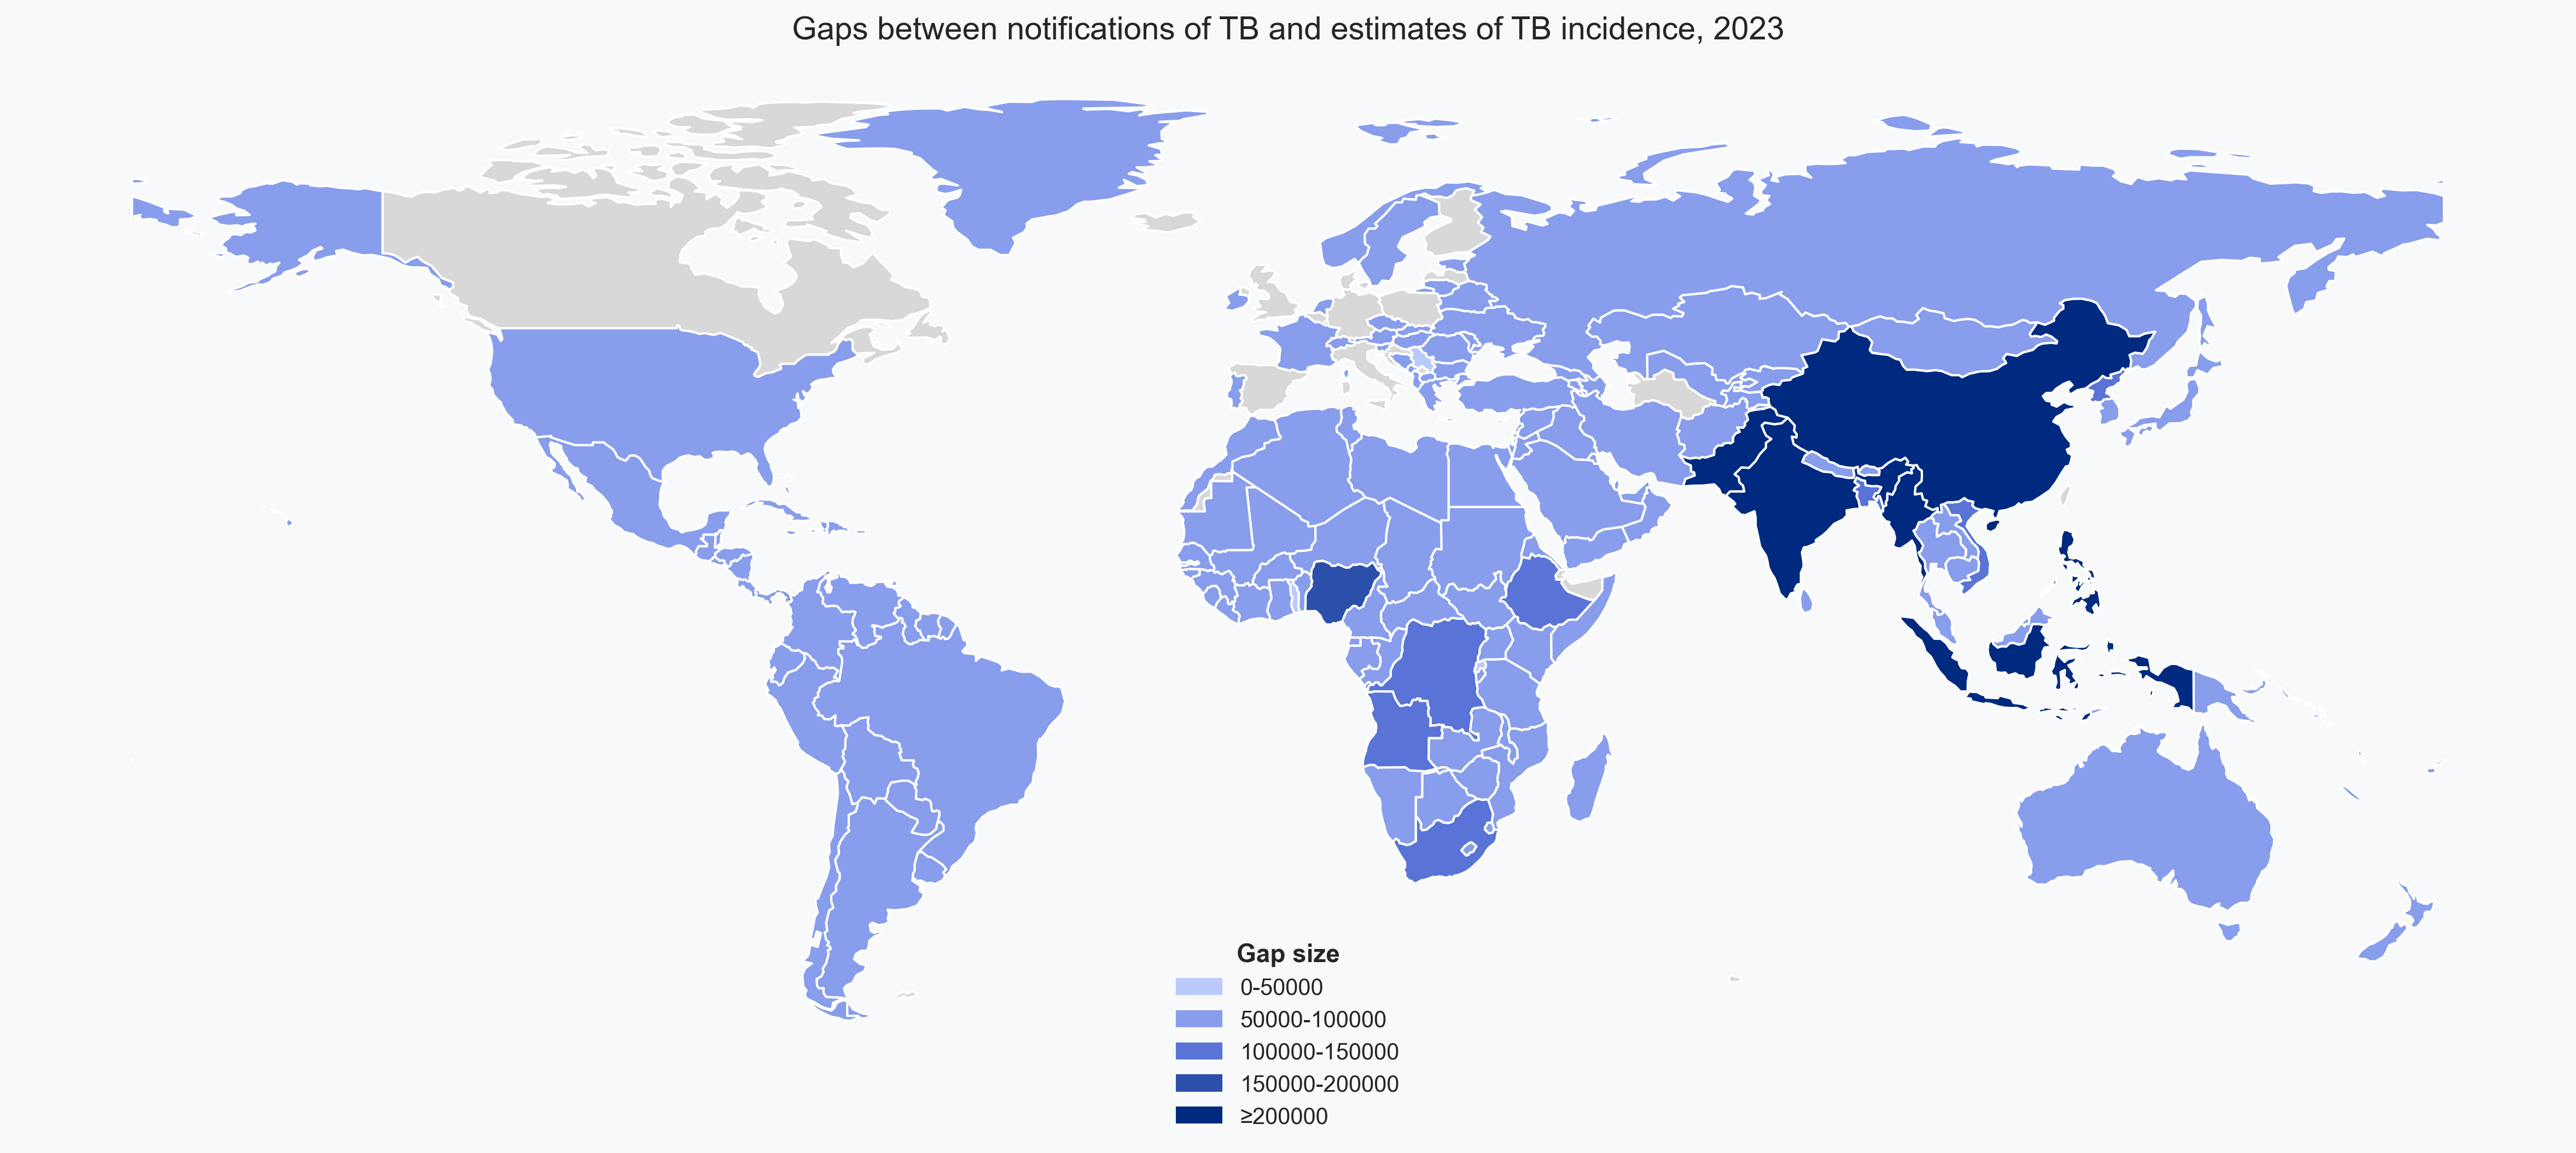

In [172]:
f2_3_5_map = world.merge(f2_3_5_all, how='left', left_on='iso_a3', right_on='iso3')
f2_3_5_map = f2_3_5_map[f2_3_5_map['continent'] != 'Antarctica']

palette_map = ['#bac9fe','#889eec','#5974d6','#2c4fab', '#002a80']
color_scale = [0, 50000, 100000, 150000, 200000]
legend_labels = ['0-50000', '50000-100000', '100000-150000', '150000-200000', '≥200000']


# Function to get the color based on 'size'
def get_color(size):
    if pd.isna(size):
        return '#d8d8d8'  # Grey for No Data
    for i, val in enumerate(color_scale):
        if size <= val:
            return palette_map[i]
    return palette_map[-1]

# Apply the colors to the 'color' column
f2_3_5_map['color'] = f2_3_5_map['size'].apply(get_color)

fig, ax = plt.subplots(1, 1, figsize=(20, 12), dpi=300)
ax.set_facecolor('#F8F9FA')
fig.patch.set_facecolor('#F8F9FA')

f2_3_5_map.plot(ax=ax, color=f2_3_5_map['color'], legend=True)
plt.title('Gaps between notifications of TB and estimates of TB incidence, 2023')
plt.axis('off')


# Create custom legend with refined styling
color_patches = [mpatches.Patch(color=palette_map[i], 
                                label=legend_labels[i],
                                edgecolor='#666666',
                                linewidth=0.5) 
                for i in range(len(palette_map))]


# Add legend with refined styling
legend = ax.legend(handles=color_patches, 
                  title="Gap size", 
                  loc='lower center',
                  bbox_to_anchor=(0.5, -0.08), 
                  fontsize=10)

# Style the legend title
legend.get_title().set_fontsize('11')
legend.get_title().set_fontweight('bold')



### WHO benchmarks

In [199]:
# read WHO/dx_benchmarks-main/dx_benchmark_exp.csv
df_bench = pd.read_csv('dx_benchmarks-main/dx_benchmark_exp.csv', na_values="") # description of benchmarks
df_str = pd.read_csv('dx_benchmarks-main/latest_strategy_2024-10-18.csv', na_values="")
df_tpt = pd.read_csv("dx_benchmarks-main/latest_contacts_tpt_2024-10-18.csv", na_values="")
df_notif = pd.read_csv("dx_benchmarks-main/latest_notifications_2024-10-18.csv", na_values="")

In [200]:
# Perform left joins
df = df_str.merge(df_tpt, on='iso2', how='left')
df = df.merge(df_notif, on='iso2', how='left')

# Filter rows
#select = []  # Define 'select' as needed
#benchmark = df[(df['plhiv_all_screen_data_available'].notna()) | (df['iso2'].isin(select))]
benchmark = df

In [202]:

# Select specific columns for benchmarks
benchmark = benchmark[['iso2', 'country', 'year',
    'newinc_con_screen', 'newinc_con',
    'plhiv_all_screen', 'plhiv_all',
    'plhiv_new_screen', 'plhiv_new',
    'prisoners_screen', 'prisoners',
    'miners_screen', 'miners',
    'district_cxr', 'district',
    'district_wrd', 'phcf_wrd', 'phcf',
    'newinc_rdx', 'c_newinc', 'wrd_test_capacity', 'presumptive',
    'm_wrd_error_rate_lte_5pct', 'm_wrd',
    'presumptive_wrd',  'r_rlt_new', 'r_rlt_ret',
    'pulm_labconf_new', 'pulm_labconf_ret', 'rr_dst_rlt_fq', 'rr_new', 'rr_ret',
    'rr_fqr_bdqr_lzdr', 'rr_fqr_bdqs_lzdr', 'rr_fqr_bdqu_lzdr',
    'rr_fqr_bdqr_lzds', 'rr_fqr_bdqs_lzds', 'rr_fqr_bdqu_lzds',
    'rr_fqr_bdqr_lzdu', 'rr_fqr_bdqs_lzdu', 'rr_fqr',
    'newinc_pulm_labconf_rdx', 'newinc_pulm_clindx_rdx',
    'new_labconf', 'new_clindx', 'ret_rel_labconf', 'ret_rel_clindx',
    'district_monitor_pos_rate', 'm_wrd_tat_lt_48h']]

# Get the latest year
year = benchmark['year'].max()


In [203]:
benchmark['benchmark_1A'] = (benchmark['newinc_con_screen'] / benchmark['newinc_con']) * 100

benchmark['benchmark_1B'] = (benchmark['plhiv_all_screen'] / benchmark['plhiv_all']) * 100

benchmark['benchmark_1C'] = (benchmark['plhiv_new_screen'] / benchmark['plhiv_new']) * 100

benchmark['benchmark_1D'] = (benchmark['prisoners_screen'] / benchmark['prisoners']) * 100

benchmark['benchmark_1E'] = (benchmark['miners_screen'] / benchmark['miners']) * 100

benchmark['benchmark_2'] = (benchmark['district_cxr'] / benchmark['district']) * 100

benchmark['benchmark_3'] = (benchmark['district_wrd'] / benchmark['district']) * 100 # useful

benchmark['benchmark_4'] = (benchmark['phcf_wrd'] / benchmark['phcf']) * 100 # useful

benchmark['benchmark_5'] = (benchmark['newinc_rdx'] / benchmark['c_newinc']) * 100 # useful

benchmark['benchmark_6'] = (benchmark['wrd_test_capacity'] / benchmark['presumptive']) * 100

benchmark['benchmark_7'] = (benchmark['m_wrd_error_rate_lte_5pct'] / benchmark['m_wrd']) * 100

benchmark['benchmark_8'] = (benchmark['presumptive_wrd'] / benchmark['presumptive']) * 100

benchmark['benchmark_9A'] = (benchmark[['r_rlt_new', 'r_rlt_ret']].sum(axis=1) / benchmark[['pulm_labconf_new', 'pulm_labconf_ret']].sum(axis=1)) * 100

benchmark['benchmark_9B'] = (benchmark['rr_dst_rlt_fq'] / benchmark[['rr_new', 'rr_ret']].sum(axis=1)) * 100

benchmark['benchmark_9C'] = (benchmark[['rr_fqr_bdqr_lzdr', 'rr_fqr_bdqs_lzdr', 'rr_fqr_bdqr_lzds', 'rr_fqr_bdqs_lzds', 'rr_fqr_bdqr_lzdu', 'rr_fqr_bdqs_lzdu']].sum(axis=1) / benchmark['rr_fqr']) * 100

benchmark['benchmark_9D'] = (benchmark[['rr_fqr_bdqr_lzdr', 'rr_fqr_bdqs_lzdr', 'rr_fqr_bdqu_lzdr', 'rr_fqr_bdqr_lzds', 'rr_fqr_bdqs_lzds', 'rr_fqr_bdqu_lzds']].sum(axis=1) / benchmark['rr_fqr']) * 100

benchmark['benchmark_10'] = (benchmark[['newinc_pulm_labconf_rdx', 'newinc_pulm_clindx_rdx']].sum(axis=1) / benchmark[['new_labconf', 'new_clindx', 'ret_rel_labconf', 'ret_rel_clindx']].sum(axis=1)) * 100

benchmark['benchmark_11'] = (benchmark['district_monitor_pos_rate'] / benchmark['district']) * 100

benchmark['benchmark_12'] = (benchmark['m_wrd_tat_lt_48h'] / benchmark['m_wrd']) * 100


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


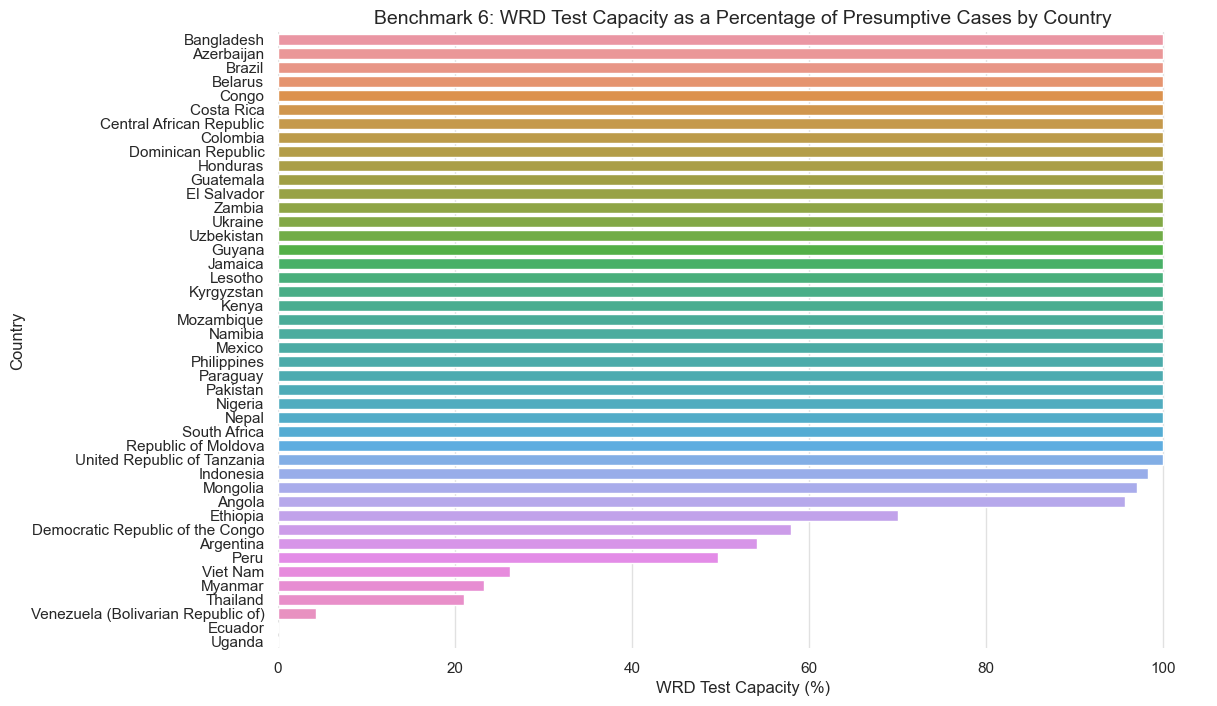

In [206]:
# Drop rows with NaN values in 'benchmark_6'
benchmark_filtered = benchmark.dropna(subset=['benchmark_3'])

# Sort the data by 'benchmark_6' for better visualization
benchmark_sorted = benchmark_filtered.sort_values(by='benchmark_3', ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='benchmark_3', y='country', data=benchmark_sorted)
plt.title('Benchmark 6: WRD Test Capacity as a Percentage of Presumptive Cases by Country')
plt.xlabel('WRD Test Capacity (%)')
plt.ylabel('Country')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: Futur

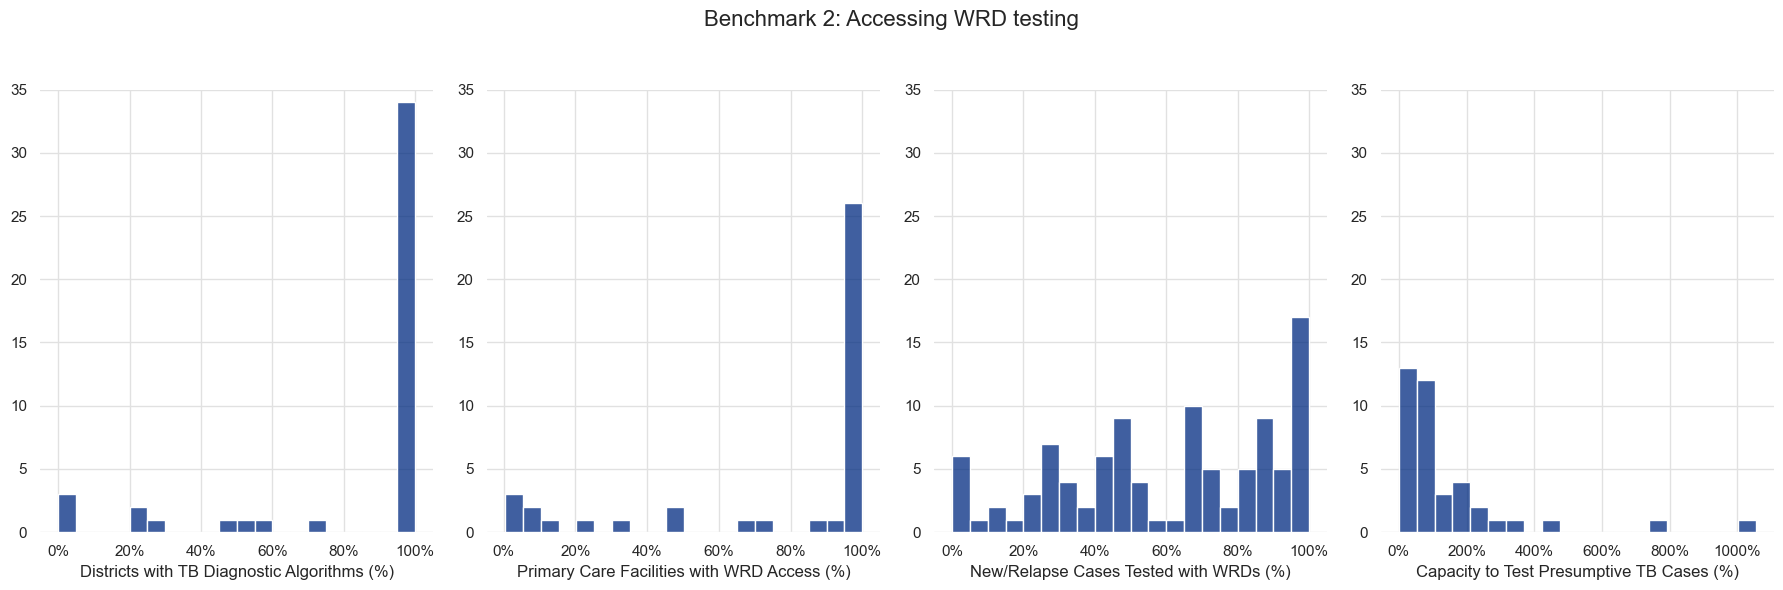

In [216]:
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

# Define a common y-axis limit
y_limit = 35

# Plot benchmark_3
sns.histplot(benchmark['benchmark_3'], bins=20, ax=axes[0], color='#002a80')
axes[0].set_xlabel('Districts with TB Diagnostic Algorithms (%)')
axes[0].set_ylabel('')  # Remove y-axis label
axes[0].set_ylim(0, y_limit)  # Set y-axis limit
axes[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))  # Add % to x-axis

# Plot benchmark_4
sns.histplot(benchmark['benchmark_4'], bins=20, ax=axes[1], color='#002a80')
axes[1].set_xlabel('Primary Care Facilities with WRD Access (%)')
axes[1].set_ylabel('')  # Remove y-axis label
axes[1].set_ylim(0, y_limit)  # Set y-axis limit
axes[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))  # Add % to x-axis

# Plot benchmark_5
sns.histplot(benchmark['benchmark_5'], bins=20, ax=axes[2], color='#002a80')
axes[2].set_xlabel('New/Relapse Cases Tested with WRDs (%)')
axes[2].set_ylabel('')  # Remove y-axis label
axes[2].set_ylim(0, y_limit)  # Set y-axis limit
axes[2].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))  # Add % to x-axis

# Plot benchmark_6
sns.histplot(benchmark['benchmark_6'], bins=20, ax=axes[3], color='#002a80')
axes[3].set_xlabel('Capacity to Test Presumptive TB Cases (%)')
axes[3].set_ylabel('')  # Remove y-axis label
axes[3].set_ylim(0, y_limit)  # Set y-axis limit
axes[3].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))  # Add % to x-axis

# Adjust layout for better spacing
plt.suptitle('Benchmark 2: Accessing WRD testing', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: Futur

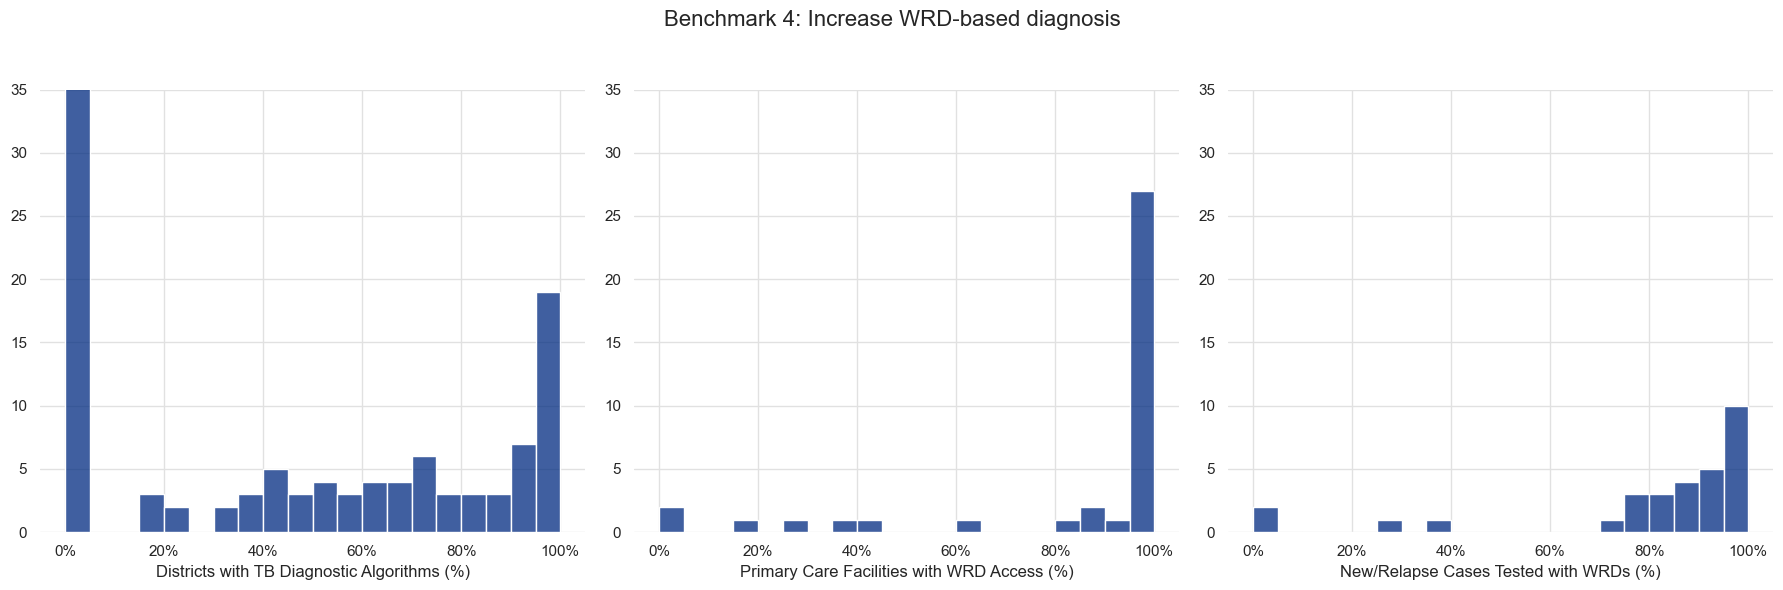

In [217]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Define a common y-axis limit
y_limit = 35

# Plot benchmark_3
sns.histplot(benchmark['benchmark_10'], bins=20, ax=axes[0], color='#002a80')
axes[0].set_xlabel('Districts with TB Diagnostic Algorithms (%)')
axes[0].set_ylabel('')  # Remove y-axis label
axes[0].set_ylim(0, y_limit)  # Set y-axis limit
axes[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))  # Add % to x-axis

# Plot benchmark_4
sns.histplot(benchmark['benchmark_11'], bins=20, ax=axes[1], color='#002a80')
axes[1].set_xlabel('Primary Care Facilities with WRD Access (%)')
axes[1].set_ylabel('')  # Remove y-axis label
axes[1].set_ylim(0, y_limit)  # Set y-axis limit
axes[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))  # Add % to x-axis

# Plot benchmark_5
sns.histplot(benchmark['benchmark_12'], bins=20, ax=axes[2], color='#002a80')
axes[2].set_xlabel('New/Relapse Cases Tested with WRDs (%)')
axes[2].set_ylabel('')  # Remove y-axis label
axes[2].set_ylim(0, y_limit)  # Set y-axis limit
axes[2].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))  # Add % to x-axis


# Adjust layout for better spacing
plt.suptitle('Benchmark 4: Increase WRD-based diagnosis', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Budget data

In [180]:
# Funding available for TB prevention, diagnostic and treatment services in 132 low- and middle-income countries by source,a,b,c 2015–2023,
#  compared with the 2027 global target set at the 2023 UN high-level meeting on TB
f4_1_2 = pd.read_excel('githuboutputs/f4.1.2_data.xlsx')

f4_1_2b = pd.read_excel('githuboutputs/f4.1.2b_data.xlsx')#country data

#Funding availablea for TB prevention, diagnostic and treatment services in the 30 high TB burden countries 
# #and three global TB watchlist countries,b based on NTP reported data, disaggregated by source of funding, 2015–2023
f4_1_4 = pd.read_excel('githuboutputs/f4.1.4_data.xlsx')

# Gaps between the funding required for national strategic plans for TB and the expected level of funding as reported by national TB programmes,
# #a by income group and by WHO region, 2015–2024
f4_1_8 = pd.read_excel('githuboutputs/f4.1.8_data.xlsx')

#Sources of fundinga and funding gaps reported for the TB-specific budgets included in national strategic plans for TB in the 30 high TB burden countries and three global TB watchlist countries,b 2024c
f4_1_9 = pd.read_excel('githuboutputs/f4.1.9_data.xlsx')

#Estimated cost per person treated for drug-susceptible TBa compared with GDP per capita in 119 countries,b 2023
f4_1_11 = pd.read_excel('githuboutputs/f4.1.11_data.xlsx')

# Estimated cost per person treated for drug-resistant TBa compared with GDP per capita in 89 countries,b 2023
f4_1_12 = pd.read_excel('githuboutputs/f4.1.12_data.xlsx')


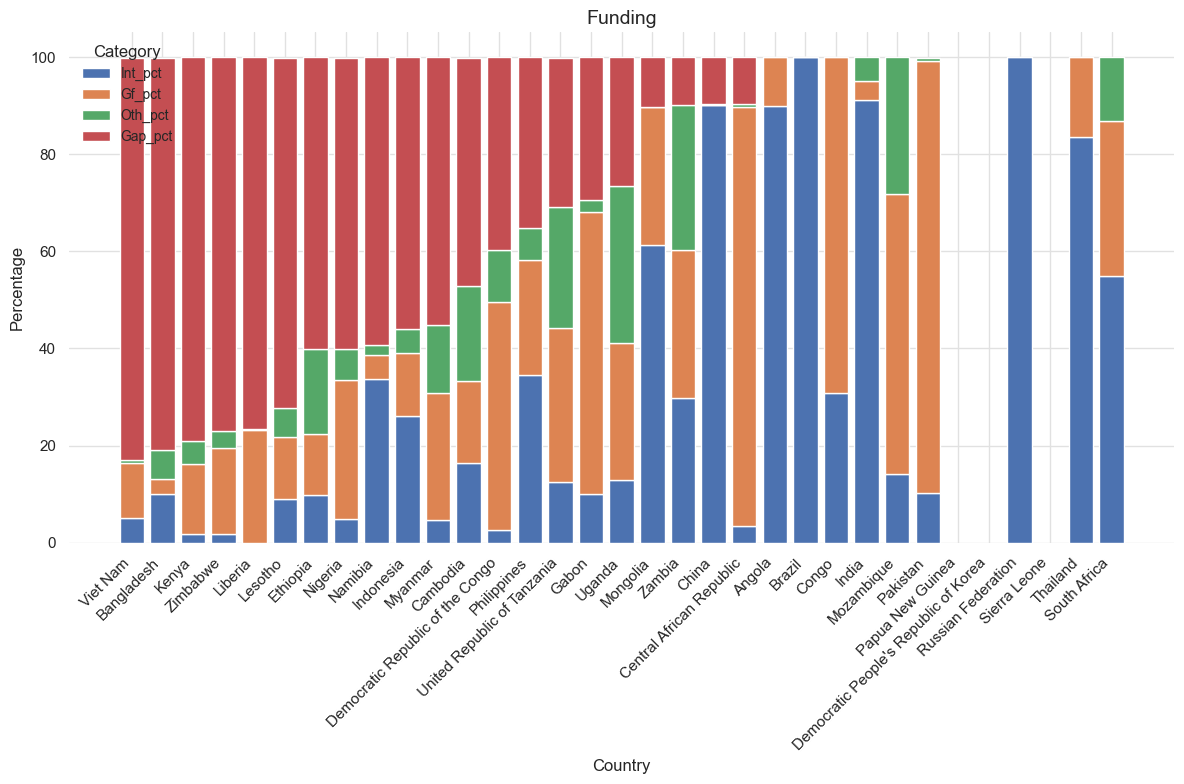

In [181]:
f4_1_9 = f4_1_9.sort_values(by="gap_pct", ascending=False)

fig, ax = plt.subplots(figsize=(12, 8))

# Stacked bar chart
bar_width = 0.8
countries = f4_1_9["country"]
x = range(len(countries))

ax.bar(x, f4_1_9["int_pct"], width=bar_width, label="Int_pct")
ax.bar(x, f4_1_9["gf_pct"], width=bar_width, bottom=f4_1_9["int_pct"], label="Gf_pct")
ax.bar(
    x,
    f4_1_9["oth_pct"],
    width=bar_width,
    bottom=f4_1_9["int_pct"] + f4_1_9["gf_pct"],
    label="Oth_pct",
)
ax.bar(
    x,
    f4_1_9["gap_pct"],
    width=bar_width,
    bottom=f4_1_9["int_pct"] + f4_1_9["gf_pct"] + f4_1_9["oth_pct"],
    label="Gap_pct",
)

# Add labels, title, and legend
ax.set_xlabel("Country", fontsize=12)
ax.set_ylabel("Percentage", fontsize=12)
ax.set_title("Funding", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(countries, rotation=45, ha="right")
ax.legend(title="Category", fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

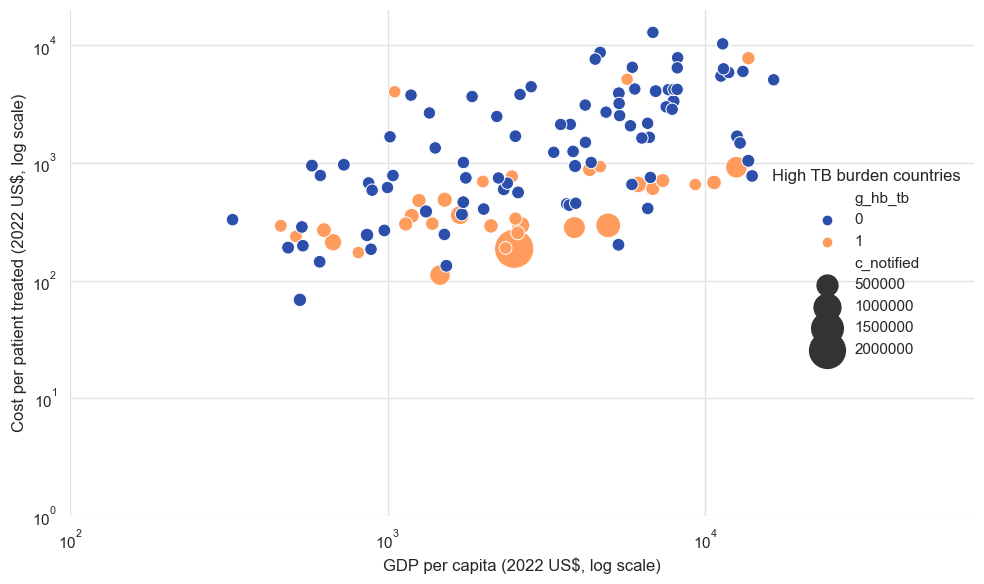

In [182]:
# Filter out "CUB"
benchmark = f4_1_11[f4_1_11['iso3'] != 'CUB']

# Create the plot
plt.figure(figsize=(10, 6))

# Set log scale for both axes
plt.xscale('log')
plt.yscale('log')

# Plot the scatter plot
sns.scatterplot(
    data=benchmark, 
    x='imf_gdp_pc_con_usd', 
    y='c_pp_dots', 
    size='c_notified', 
    hue='g_hb_tb', 
    palette={0: '#2c4fab', 1: '#ff9b5c'},  # 1 for "Rest of world", 2 for "30 High TB burden countries"
    sizes=(80, 800),  # Increase the size range
    legend='brief',
    marker='o'
)
# Adjust the scale limits
plt.xlim(100, 70000)
plt.ylim(1, 20000)

# Set labels
report_year = 2023  # Or set it dynamically
plt.xlabel(f"GDP per capita ({report_year-1} US$, log scale)")
plt.ylabel(f"Cost per patient treated ({report_year-1} US$, log scale)")

# Customize the legend
plt.legend(title="High TB burden countries", loc='right')

# Show the plot
plt.tight_layout()
plt.show()


In [183]:
display(budget.head())

print("\nBasic statistics:")
display(budget.describe())

,country,iso2,iso3,iso_numeric,g_whoregion,year,tx_dstb,budget_cpp_dstb,tx_mdr,budget_cpp_mdr,...,cf_orsrvy,budget_oth,cf_oth,budget_tot,cf_tot,cf_tot_domestic,cf_tot_gf,cf_tot_usaid,cf_tot_grnt,cf_tot_sources
0,Afghanistan,AF,AFG,4,EMR,2018,52000.0,40.0,450.0,1400.0,...,344940.0,NaN,2912498.0,10881354.0,10698483.0,533779.0,3178499.0,4462530.0,2523675.0,10698483.0
1,Afghanistan,AF,AFG,4,EMR,2019,53000.0,50.0,585.0,1500.0,...,59000.0,5344361.0,5171641.0,16957452.0,13419792.0,511854.0,6533095.0,2766449.0,3608394.0,13419792.0
2,Afghanistan,AF,AFG,4,EMR,2020,57000.0,40.0,580.0,1000.0,...,400000.0,4000000.0,3600775.0,19137128.0,17978424.0,1171864.0,6935551.0,3000000.0,6871009.0,17978424.0
3,Afghanistan,AF,AFG,4,EMR,2021,53825.0,50.0,725.0,1000.0,...,127420.0,3606831.0,3606831.0,10633599.0,10633599.0,NaN,7638546.0,NaN,2995053.0,10633599.0
4,Afghanistan,AF,AFG,4,EMR,2022,56795.0,50.0,600.0,1000.0,...,67310.0,3529753.0,3529753.0,14141821.0,10599950.0,269339.0,6876137.0,1555946.0,1898528.0,10599950.0



Basic statistics:


,iso_numeric,year,tx_dstb,budget_cpp_dstb,tx_mdr,budget_cpp_mdr,tx_xdr,budget_cpp_xdr,tx_tpt,budget_cpp_tpt,...,cf_orsrvy,budget_oth,cf_oth,budget_tot,cf_tot,cf_tot_domestic,cf_tot_gf,cf_tot_usaid,cf_tot_grnt,cf_tot_sources
count,1505.000000,1505.000000,7.820000e+02,746.000000,779.000000,742.000000,701.000000,638.000000,5.240000e+02,498.000000,...,6.560000e+02,6.290000e+02,6.310000e+02,9.590000e+02,7.480000e+02,7.100000e+02,7.060000e+02,5.620000e+02,6.020000e+02,7.520000e+02
mean,433.200000,2021.000000,7.088368e+04,580.002681,1781.655969,3791.586253,206.590585,5679.039185,7.010279e+04,230.720884,...,5.015004e+05,6.146551e+06,5.203985e+06,4.881124e+07,4.577548e+07,3.786471e+07,7.776269e+06,2.283625e+06,9.678909e+05,4.553199e+07
std,252.717069,2.000665,2.529095e+05,8038.865483,6328.902961,19108.393708,1022.730391,12907.698414,2.639463e+05,2136.964402,...,2.212343e+06,3.442556e+07,3.312600e+07,1.622822e+08,1.698461e+08,1.704673e+08,1.558855e+07,5.166771e+06,3.099182e+06,1.694260e+08
min,4.000000,2018.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.140000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,212.000000,2019.000000,2.576250e+03,34.250000,44.500000,906.250000,1.000000,900.000000,1.348500e+03,9.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,1.201550e+06,1.897654e+06,4.675368e+05,6.500000e+05,0.000000e+00,0.000000e+00,1.842642e+06
50%,434.000000,2021.000000,8.875000e+03,50.000000,180.000000,1500.000000,5.000000,3055.000000,5.000000e+03,15.000000,...,5.736000e+04,2.242000e+05,1.250000e+05,6.180000e+06,7.001364e+06,2.321808e+06,2.418268e+06,0.000000e+00,4.000000e+04,6.882944e+06
75%,646.000000,2023.000000,3.154250e+04,73.000000,678.000000,2816.000000,30.000000,5949.250000,2.288275e+04,29.000000,...,2.450238e+05,1.828571e+06,1.047754e+06,2.711594e+07,2.061117e+07,1.012848e+07,6.347331e+06,6.912640e+05,5.755925e+05,2.056800e+07
max,894.000000,2024.000000,3.000000e+06,174700.000000,71000.000000,400000.000000,13200.000000,250000.000000,3.500000e+06,30000.000000,...,3.430065e+07,3.617290e+08,3.617290e+08,1.640128e+09,1.640128e+09,1.639948e+09,1.596484e+08,2.500000e+07,4.000000e+07,1.640128e+09


In [184]:
budget.columns

Index(['country', 'iso2', 'iso3', 'iso_numeric', 'g_whoregion', 'year',
       'tx_dstb', 'budget_cpp_dstb', 'tx_mdr', 'budget_cpp_mdr', 'tx_xdr',
       'budget_cpp_xdr', 'tx_tpt', 'budget_cpp_tpt', 'budget_lab', 'cf_lab',
       'budget_staff', 'cf_staff', 'budget_fld', 'cf_fld', 'budget_prog',
       'cf_prog', 'budget_sld', 'cf_sld', 'budget_mdrmgt', 'cf_mdrmgt',
       'budget_tpt', 'cf_tpt', 'budget_tbhiv', 'cf_tbhiv', 'budget_patsup',
       'cf_patsup', 'budget_orsrvy', 'cf_orsrvy', 'budget_oth', 'cf_oth',
       'budget_tot', 'cf_tot', 'cf_tot_domestic', 'cf_tot_gf', 'cf_tot_usaid',
       'cf_tot_grnt', 'cf_tot_sources'],
      dtype='object')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


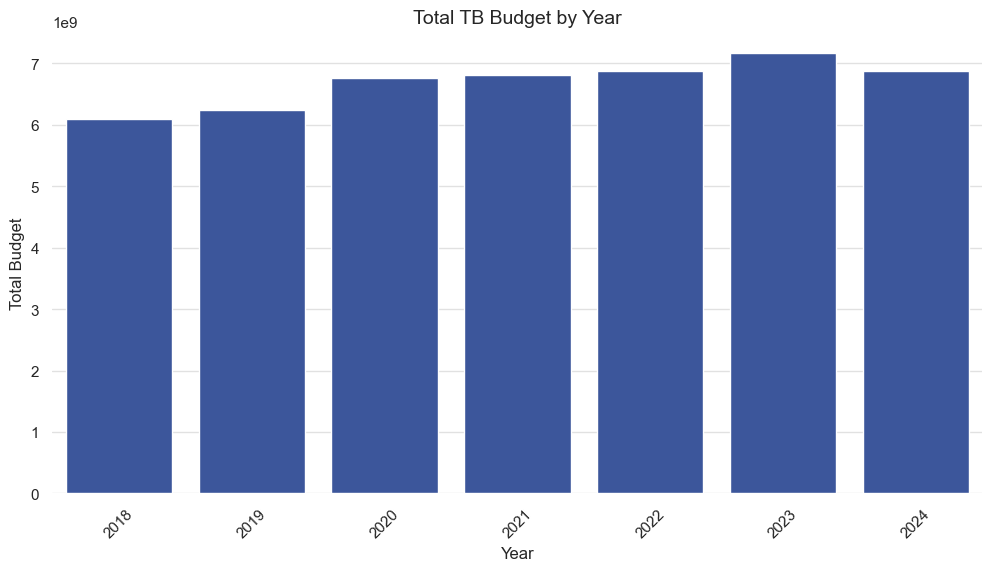

In [185]:
plt.figure(figsize=(12, 6))
yearly_budget = budget.groupby('year')['budget_tot'].sum()
sns.barplot(x=yearly_budget.index, y=yearly_budget.values, color='#2c4fab')
plt.title('Total TB Budget by Year')
plt.xlabel('Year')
plt.ylabel('Total Budget')
plt.xticks(rotation=45)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


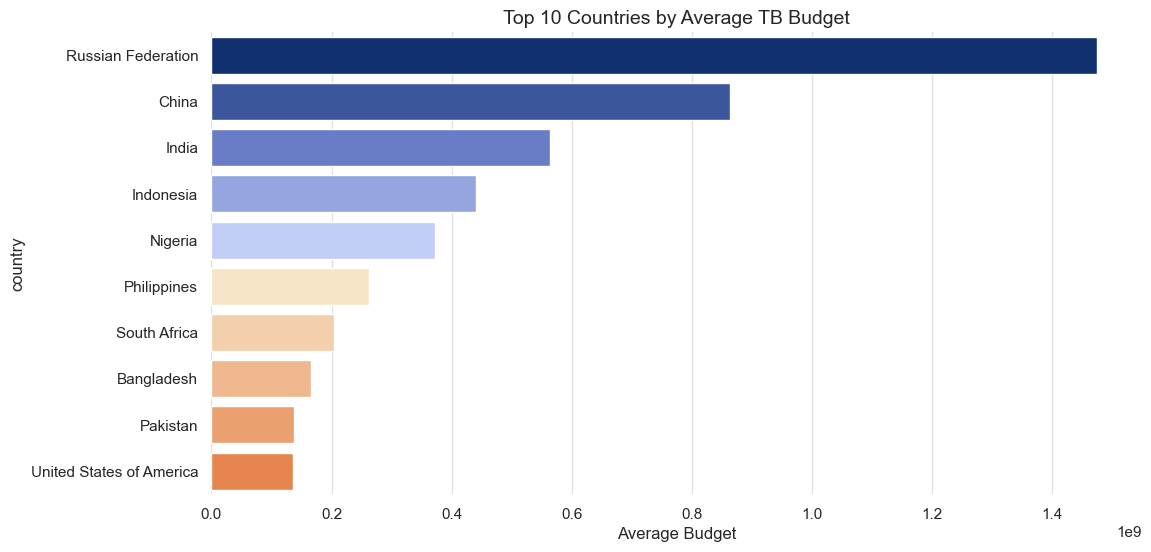

In [186]:
top_10_countries = budget.groupby('country')['budget_tot'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette=custom_palette)
plt.title('Top 10 Countries by Average TB Budget')
plt.xlabel('Average Budget')
plt.show()


In [187]:
# get iso3 and iso2 codes csv from internet
iso3 = pd.read_csv('https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv')
# Merge benchmark with iso3 
benchmark = benchmark.merge(iso3[['alpha-3', 'alpha-2']], left_on='iso2', right_on='alpha-2', how='left')

#filter f4_1_2b by year 2023
f4_1_2b_2023 = f4_1_2b[f4_1_2b['year'] == 2023]


KeyError: 'iso2'

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

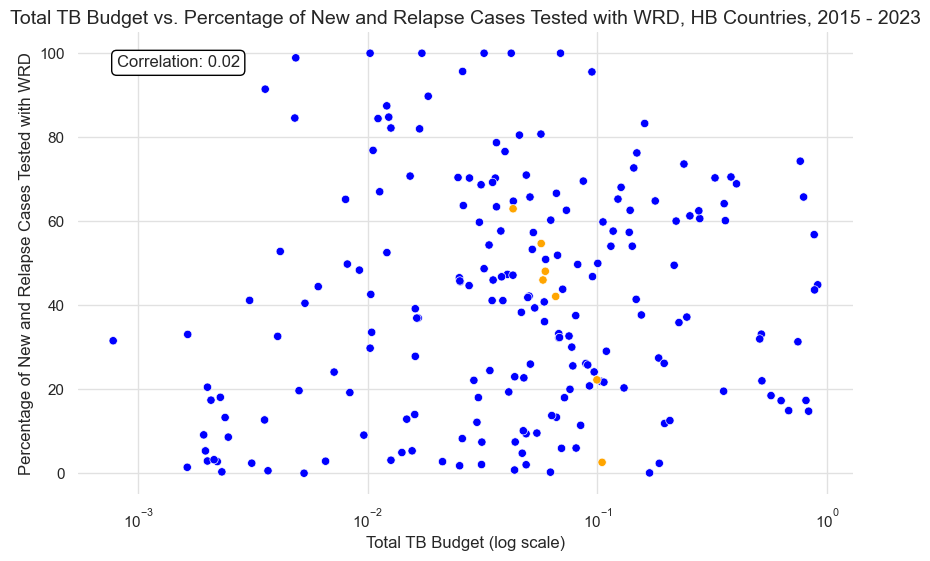

In [165]:
# merge benchmark with f4_1_2b based on iso3 / alpha-3_x
merged_df = f2_2_7.merge(f4_1_2b, on=['iso3', 'year'], how='left')

# Calculate the correlation
correlation = merged_df['tot'].corr(merged_df['wrd_pcnt'])

# Scatter plot with correlation box
plt.figure(figsize=(10, 6))

# Highlight Pakistan in orange
sns.scatterplot(x='tot', y='wrd_pcnt', data=merged_df, hue=(merged_df['iso3'] == 'PAK'), palette={True: 'orange', False: 'blue'}, legend=False)

plt.xscale('log')
plt.title('Total TB Budget vs. Percentage of New and Relapse Cases Tested with WRD, HB Countries, 2015 - 2023')
plt.xlabel('Total TB Budget (log scale)')
plt.ylabel('Percentage of New and Relapse Cases Tested with WRD')

# Add correlation box
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

plt.show()


### Laboratories

xpert:

- Number of sites providing TB diagnostic services using Xpert MTB/RIF at the end of the reporting year
- 2015 - 2019	
- Dropped in 2021 dcyear, replaced by "m_wrd"
- xpert_eqa xpert_etrans were also dropped, no replacements


other dropped variables from Notification (only available for 2011- 2016): 

- xpert_dr_r_new
- xpert_dr_r_ret
- xpert_dr_r_unk
- xpert_new
- xpert_ret
- xpert_unk

there are also strategy variables until 2014 (pretty outdates)

- lab_xpert
- lab_xpert_eqa

In [409]:

xpert_data = laboratories[['iso3', 'country', 'year', 'xpert']]
xpert_recent = xpert_data.dropna(subset=['xpert']).sort_values(by=['year'], ascending=False).drop_duplicates(subset=['iso3'])

In [410]:
pakistan_xpert = xpert_recent[xpert_recent['country'] == 'Pakistan']
pakistan_xpert = {
    'Total Xpert Labs': pakistan_xpert['xpert'].iloc[0]
}
print(pakistan_xpert)

{'Total Xpert Labs': 361.0}


(-198.0, 198.00000000000006, -62.574678, 90.607978)

<Figure size 2000x1200 with 0 Axes>

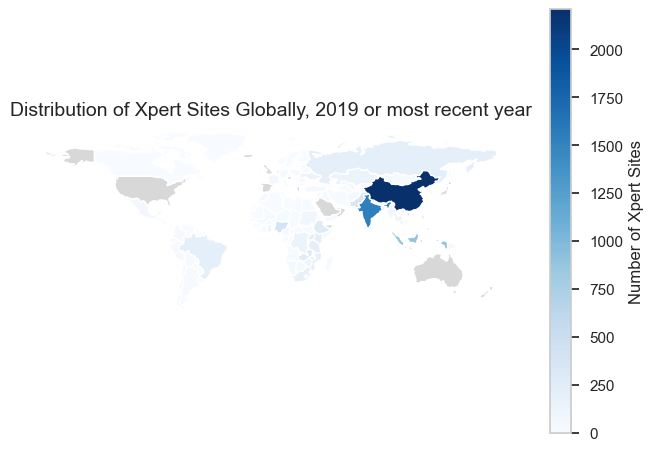

In [411]:

xpert_map = world.merge(xpert_recent, how='left', left_on=['iso_a3'], right_on=['iso3'])
xpert_map = xpert_map[xpert_map['continent'] != 'Antarctica']


plt.figure(figsize=(20, 12))
xpert_map.plot(column='xpert', 
                legend=True,
                legend_kwds={'label': 'Number of Xpert Sites'},
                missing_kwds={'color': '#d8d8d8'},
                cmap='Blues')
plt.title('Distribution of Xpert Sites Globally, 2019 or most recent year')
plt.axis('off')



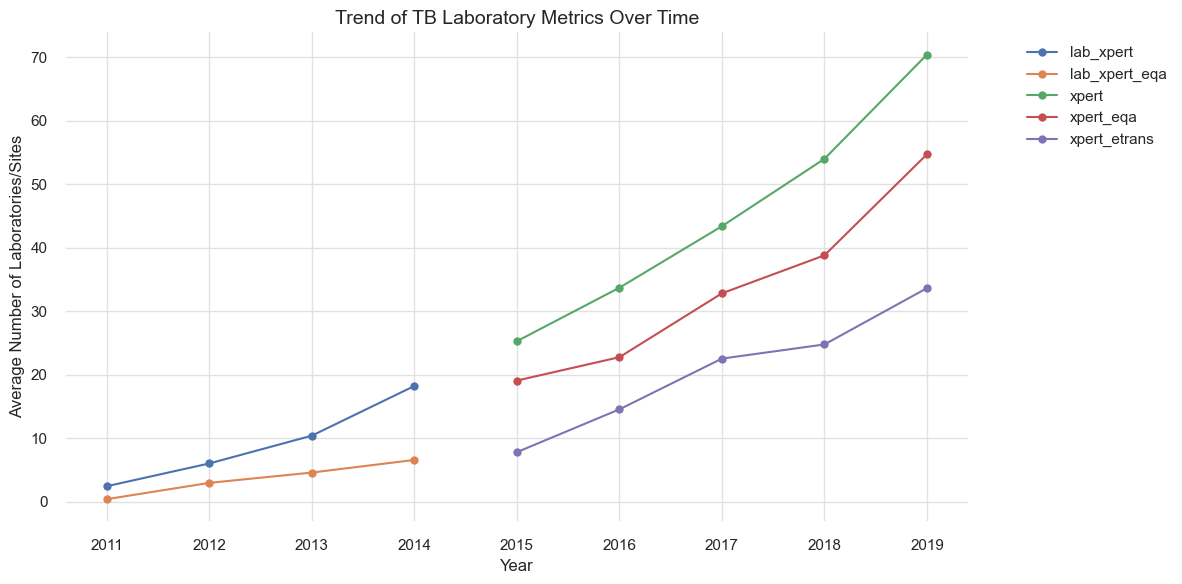

In [ ]:
lab_columns = ['lab_xpert', 'lab_xpert_eqa', 'xpert', 'xpert_eqa', 'xpert_etrans']


#  time series plot to see how these metrics changed over time
plt.figure(figsize=(12, 6))
for column in lab_columns:
    yearly_mean = laboratories.groupby('year')[column].mean()
    plt.plot(yearly_mean.index, yearly_mean.values, marker='o', label=column)

plt.title('Trend of TB Laboratory Metrics Over Time')
plt.xlabel('Year')
plt.ylabel('Average Number of Laboratories/Sites')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

